## 0. Librerias

In [1]:
import pandas as pd
import urllib.request
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

import ML_tool_box_basic_plot as tbb

pd.set_option('display.max_columns', None) 

## 1. Data

In [2]:
### Para que funcione necesitas bajarte los archivos de datos de Kaggle 
df = pd.read_csv("data/train.csv")
df2 = pd.read_csv("data/test.csv")

## 2. Data exploration

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
0,755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00
1,618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01
2,909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00
3,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
4,286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         912 non-null    int64  
 1   Company           912 non-null    object 
 2   Product           912 non-null    object 
 3   TypeName          912 non-null    object 
 4   Inches            912 non-null    float64
 5   ScreenResolution  912 non-null    object 
 6   Cpu               912 non-null    object 
 7   Ram               912 non-null    object 
 8   Memory            912 non-null    object 
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight            912 non-null    object 
 12  Price_in_euros    912 non-null    float64
dtypes: float64(2), int64(1), object(10)
memory usage: 92.8+ KB


- La desviacion estandar de Price_in_euros es muy grande, tiene que haber outliers muy grandes.    
- Se ve claramente en el Q75%, esta muy alejado del max.

In [5]:
df.describe()

,laptop_ID,Inches,Price_in_euros
count,912.000000,912.000000,912.000000
mean,650.312500,14.981579,1111.724090
std,382.727748,1.436719,687.959172
min,2.000000,10.100000,174.000000
25%,324.750000,14.000000,589.000000
50%,636.500000,15.600000,978.000000
75%,982.250000,15.600000,1483.942500
max,1320.000000,18.400000,6099.000000


In [6]:
tbb.ALL_describe_features(df)

,COL_N,DATA_TYPE,NO MISSING,MISSING,MISSING (%),UNIQUE_VALUES,CARDIN (%),DATA_CLASS
0,laptop_ID,int64,912,0,0.0,912,100.00,Numérica Continua
1,Company,object,912,0,0.0,19,2.08,Numérica Discreta
2,Product,object,912,0,0.0,480,52.63,Numérica Continua
3,TypeName,object,912,0,0.0,6,0.66,Categórica
4,Inches,float64,912,0,0.0,17,1.86,Numérica Discreta
5,ScreenResolution,object,912,0,0.0,36,3.95,Numérica Discreta
6,Cpu,object,912,0,0.0,107,11.73,Numérica Discreta
7,Ram,object,912,0,0.0,9,0.99,Categórica
8,Memory,object,912,0,0.0,37,4.06,Numérica Discreta
9,Gpu,object,912,0,0.0,93,10.20,Numérica Discreta


- Se comprueba si hay filas duplicadas

In [7]:
df.duplicated().value_counts()

False    912
Name: count, dtype: int64

# 3. Definición de target

- El target viene "impuesto", ya que se pide un modelo que pronostique el valor de un PCs dadas unas caracteriticas.

In [8]:
target = "Price_in_euros"

# 4. Análisis relaciones features Numéricas

## 4.1 Análisis relaciones lineales con el target

- Al haber solo dos variables numericas de inicio, solo aparecen dos graficos.   
- Vemos que contra Inches, el target (Price_in_euros) no tiene una muy buena correlacion lineal, por lo que habria que ver como tratarla para que aumentase, ya que a priori, una pantalla mas grande implica un mayor coste del PC normalmente.
- ID no tiene sentido que tenga una correlaxcion lineal, pues no es mas que un identificador del PCs, no es una feature (catacteristica) de él.

- No hay que olvidarse de los outliers y como afectan. Es muy probable que se quite la linea donde hay un PC de más de 6000 euros (se haran dos DF y se probara con y sin outliers).
- Al final, si el 75% de las filas del DF tiene un valor igual o menor a 1500 euros, quiza sea bueno tener un algoritmo que generalize bien sobre la gran mayoria de los datos y que haga mal los outliers, pues estos, al ser pocos, se podrian analizar "a mano" y darles el precio correcto.

In [9]:
#tbb.REGRE_FN_BI_FeaNum_hist_scatter_plot_with_regression(df, target_col=target)

## 4.1.2 Transformaciones simples

### Cambio de tipo de dato

- Quitamos las letras GB del string de la columna Ram, para dejar solo el valor numero y lo transformamos a entero (no hay decimales en la Ram posibles)
- Hacemos lo mismo con Weight, dejando solo su valor numerico como float en este caso (si que hay decimales).

In [10]:
df['ram_gb'] = df['Ram'].str.replace('GB', '').astype(int)
df["weight_kg"] = df['Weight'].str.replace('kg', '').astype(float)

### Para test:

df2['ram_gb'] = df2['Ram'].str.replace('GB', '').astype(int)
df2["weight_kg"] = df2['Weight'].str.replace('kg', '').astype(float)

In [11]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros,ram_gb,weight_kg
0,755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00,8,1.86
1,618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01,16,2.59
2,909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00,8,2.04
3,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,8,1.34
4,286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00,4,2.25


## 4.1.3 Análisis relaciones lineales con el target tras transformaciones básicas

- Ahora aparece el peso, el cual, de momento es el que mejor relacion lineal tiene, pero tampoco es muy buena. Iermos analizandolo posteriormente.
- Se puede apreciar PCs muy pesados (mas de 4 kg) por algo mas de 1000 euros y luego PCs muy livianos (a penas mas de 1 kg) por mas de 3000 euros.
- Quiza esta variable no aporte mucho valor al calculo del precio, pues el peso no tiene una buena correlacion.

In [12]:
# tbb.REGRE_FN_BI_FeaNum_hist_scatter_plot_with_regression(df, target_col=target)

# 5. Análisis relaciones features Categóricas

- Este data frame tiene ciertos inconvenientes:
    - Mucha informacion esta como string, del cual se puede extraer informacion valiosa y plasmarla en otras columnas. De esta manera reduciremos considerablente la cardinalidad de estas categoricas, ya que no se les puede dar un valor ordenado, pues no es posible listarlas de mejor a mayor si no es que usamos fuentes externas que nos den esa clasificacion.
    - Por eso mismo, se va a extraer la info del string y se van a crear nuevas columnas cuando sea posible.    

**FEATURES**

- Company : El analisis va a ser complejo por el gran nunero de variables (19), pero se ve claramente como hay mucho cruce de lineas y formas muy diferentes. Se vera sacara el valor porcentual de peso de cada categoria dentro de Compay para ver si es posible crear 3 o 4 categorias finales.
- Type Name: Claramente es muy buen "clasificador" de precios, por lo que nos la vamos a quedar, ademas de que "solo" tiene 6 cateorias. Analizaremos tambien si aun asi se pueden agrupar. Esto lo haremos con todas, por lo que no lo repetire de  aqui en adelante, a no ser que lo necessite decir.
- Inches: Es numerica claramente. se ve un ganador claro (15,6"), pero tiene mucho rango en precios y eso no nos ayuda. Aun asi es muy buena para el resto de tamaños de pantalla.
- Screenresolution: Aqui hay un problema porque al ser un string de texto "libre" (entiendase que dice lo mismo de maneras diferentes y por eso tiene 36 valores diferentes), tenemos cubierta una categorica o numerica mucho mas siemple. La idea aqui sera extraer la info de los pixeles totales y usarla como numerica.
- Ram: Es numerica. Sea como string o entera es lo mismo para el analisis (ya esta pasada a int, pero la funcion no la coge por ser eso, numerica). Es muy buena, nos ayudara mucho. Una pena no tener el tipo de memoria que es (DDR5, DDR4, etc.)
- Memory: Es numerica. Aqui se ve claramente que es como con el caso de inches, tenemos mucha info numerica en string. se trabajara para extraerla.
- Gpu: Necesita urgentemente que se haga algo. Es muy probable que se puedan hacer nuevas columnas con ella, pues al final, la marca y familia de la gpu se puede extraer y luego el modelo...pues quiza lo quitemos si vemos mucha cardinalidad.
- OpSys: Hay un problema con la categoeia "Windows 10" pues es la que mas frecuencia tiene y mas precios abarca. Quiza esto no nos ayude a predecir el precio, pues con Windows 10 puede tener el precio que quiera. Si que es verdad que el resto ed SO o NoOs si que tiene buena pinta, pues si que hay relacion. Quiza esta relacion vaya muy de la mano con el tipo de PC. Normalmente los Notebooks o similares ya te van con todo, porque es para gente que quiza no sepa de PCs o simplemente no quiera tener que instalarse el SO. Cierto es que sin OS sale mas economico que el mismo con un SO instalado, asi que no se qe hacer bien. Iremos pensando.


In [13]:
# tbb.REGRE_FC_plot_features_cat_regression(df, target, umbral_card=30, umbral_categoria=100, with_individual_plot=True)

# `Feature Engineering`    

- Se va a aplicar Feature Engineering para mejorar el data set y ser posible su uso en modelos que necesiten unicamente valores numericos.    
- Una vez se tenga el data frame definitivo, se volveran a estudiar las relaciones con el target y de ahi ya se extraeran las listas de features con las que se van a trabajar.    
- Es muy probable que se hagan listas diferentes para cada modelo, cosa que no permitira comparar todos con todos de manera totalmente objetiva, pero no hay otra manera.

## `"Company"`    

### De 19 a 7

- Analizando la variable en los graficos anteriores, se ve como hay una marca "Razer" que es la que nos esta desvirtuando un poco los precios.    
Presenta un outlier muy grande, de mas de 6000 euros, y ademas tiene un rango de precios muy ancho, desde los 1000 a los 6000 y presenta la media mas alta de precios (casi 3000 euros).   
- Si fuera un poco mas escalonado el tema de los precio vs marca, le asignaria un ordinal enconding, pero se chafan mucho los unos a los otros, por lo que no creo que fuera representativo.    
- He pensado en sustituir el valor de la mediana de precios por cada marca, pero no estoy seguro del todo debido a los grandes rangos de que presentan muchas marcas, aunque quiza sea una buena manera de codificarlos.

In [14]:
df.Company.nunique()

19

In [15]:
df.Company.unique()

array(['HP', 'Dell', 'Apple', 'Lenovo', 'MSI', 'Toshiba', 'Acer', 'Chuwi',
       'Asus', 'Huawei', 'Razer', 'Mediacom', 'Google', 'Samsung',
       'Xiaomi', 'Microsoft', 'Vero', 'LG', 'Fujitsu'], dtype=object)

## a) Nueva columna --> Company_groups_unique (grupos segun el % de presencia en el data set, pero lo que tiene mas de 10% son ellos mismos el grupo)

In [16]:
company_percentages = df['Company'].value_counts(normalize=True) * 100

# Crear una función para asignar los grupos según el porcentaje
def asignar_grupo_modificado(percent, company):
    if percent > 10:
        return company  # Mantener el nombre de la marca
    elif percent > 1:
        return "Grupo_1"  # Grupo de marcas entre 1% y 10%
    else:
        return "Grupo_2"  # Grupo de marcas con menos del 1%

# Crear una nueva columna 'Company_groups' asignando los grupos según el porcentaje
df['Company_groups_unique'] = df['Company'].map(company_percentages).combine(df['Company'], asignar_grupo_modificado)


# Ver el DataFrame actualizado
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros,ram_gb,weight_kg,Company_groups_unique
0,755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00,8,1.86,HP
1,618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01,16,2.59,Dell
2,909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00,8,2.04,HP
3,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,8,1.34,Grupo_1
4,286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00,4,2.25,Dell


In [17]:
# Para test
df2['Company_groups_unique'] = df2['Company'].map(company_percentages).combine(df2['Company'], asignar_grupo_modificado)

df2.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,ram_gb,weight_kg,Company_groups_unique
0,209,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.4kg,16,2.400,Lenovo
1,1281,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,4,2.400,Grupo_1
2,1168,Lenovo,V110-15ISK (i3-6006U/4GB/1TB/No,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,Intel HD Graphics 520,No OS,1.9kg,4,1.900,Lenovo
3,1231,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.191kg,8,2.191,Dell
4,1020,HP,ProBook 640,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg,4,1.950,HP


## b) Nueva columna --> Company_groups (grupos segun el % de presencia en el data set)

In [18]:
df.Company.value_counts(True)*100

Company
Lenovo       22.149123
Dell         21.600877
HP           21.271930
Asus         13.267544
Acer          8.114035
MSI           4.057018
Toshiba       3.728070
Apple         1.864035
Razer         0.657895
Mediacom      0.657895
Microsoft     0.548246
Samsung       0.548246
Xiaomi        0.328947
Vero          0.219298
Huawei        0.219298
Google        0.219298
Chuwi         0.219298
Fujitsu       0.219298
LG            0.109649
Name: proportion, dtype: float64

In [19]:
# Calcular el porcentaje de representación de cada marca en la columna 'Company'
company_percentages = df['Company'].value_counts(normalize=True) * 100

# Crear una función para asignar los grupos según el porcentaje
def asignar_grupo(percent):
    if percent > 10:
        return "Grupo_1"
    elif percent > 1 and percent <= 10:
        return "Grupo_2"
    else:
        return "Grupo_3"

# Crear una nueva columna 'Company_groups' asignando los grupos según el porcentaje
df['Company_groups'] = df['Company'].map(company_percentages).apply(asignar_grupo)

# Ver el DataFrame actualizado
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros,ram_gb,weight_kg,Company_groups_unique,Company_groups
0,755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00,8,1.86,HP,Grupo_1
1,618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01,16,2.59,Dell,Grupo_1
2,909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00,8,2.04,HP,Grupo_1
3,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,8,1.34,Grupo_1,Grupo_2
4,286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00,4,2.25,Dell,Grupo_1


In [20]:
# Para Test

df2['Company_groups'] = df2['Company'].map(company_percentages).apply(asignar_grupo)

df2.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,ram_gb,weight_kg,Company_groups_unique,Company_groups
0,209,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.4kg,16,2.400,Lenovo,Grupo_1
1,1281,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,4,2.400,Grupo_1,Grupo_2
2,1168,Lenovo,V110-15ISK (i3-6006U/4GB/1TB/No,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,Intel HD Graphics 520,No OS,1.9kg,4,1.900,Lenovo,Grupo_1
3,1231,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.191kg,8,2.191,Dell,Grupo_1
4,1020,HP,ProBook 640,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg,4,1.950,HP,Grupo_1


## c) Nueva columna --> Company_cluster (usando cluster aglomerativo y medidas estadisticas respecto al precio)

In [21]:


# Agrupar por 'Company' y calcular la media, mediana y desviación estándar de 'Price_in_euros'
df_grouped_company = df.groupby('Company')['Price_in_euros'].agg(mean_price='mean', median_price_company='median', std_price='std')

# Reemplazar valores NaN en 'std_price' con el valor de 'median_price_company'
df_grouped_company['std_price'] = df_grouped_company.apply(
    lambda row: row['median_price_company'] if pd.isna(row['std_price']) else row['std_price'],
    axis=1
)

# Reemplazar solo los valores NaN en 'median_price_company' con los valores correspondientes de 'mean_price'
df_grouped_company['median_price_company'] = df_grouped_company['median_price_company'].fillna(df_grouped_company['mean_price'])

# Calcular la razón entre la mediana y la desviación estándar
df_grouped_company['ratio_median_std'] = df_grouped_company['median_price_company'] / df_grouped_company['std_price']

# Calcular el porcentaje de representatividad de cada marca
company_proportion = df['Company'].value_counts(normalize=True) * 100

# Añadir el porcentaje al DataFrame agrupado
df_grouped_company['company_proportion'] = company_proportion

# Ordenar por la razón entre mediana y desviación estándar en orden descendente
df_grouped_company = df_grouped_company.sort_values(by="median_price_company", ascending=False)

# Ver el DataFrame actualizado
df_grouped_company


,mean_price,median_price_company,std_price,ratio_median_std,company_proportion
Company,,,,,
Razer,2987.333333,2749.000,1752.146303,1.568933,0.657895
LG,2299.000000,2299.000,2299.000000,1.000000,0.109649
Google,1879.000000,1879.000,452.548340,4.152043,0.219298
Microsoft,1716.970000,1799.000,604.561146,2.975712,0.548246
Samsung,1423.000000,1699.000,647.402502,2.624333,0.548246
MSI,1713.425135,1598.000,547.036057,2.921197,4.057018
Huawei,1424.000000,1424.000,106.066017,13.425601,0.219298
Apple,1540.322353,1419.000,521.131185,2.722923,1.864035
Toshiba,1276.558824,1240.000,503.866155,2.460971,3.728070


In [22]:
from sklearn.preprocessing import StandardScaler

# Seleccionar solo las columnas numéricas
X = df_grouped_company.select_dtypes(include=[float, int])

# Crear el objeto StandardScaler
scaler = StandardScaler()

# Ajustar y transformar los datos
X_scaled = scaler.fit_transform(X)

# Convertir el resultado en un DataFrame con las mismas columnas e índice
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=df_grouped_company.index)

# Ver el DataFrame estandarizado
X_scaled_df 

,mean_price,median_price_company,std_price,ratio_median_std,company_proportion
Company,,,,,
Razer,2.535296,2.281404,2.109250,-0.365684,-0.589164
LG,1.523073,1.609559,3.083723,-0.394878,-0.659303
Google,0.905446,0.982502,-0.206585,-0.233136,-0.645275
Microsoft,0.667174,0.863063,0.064296,-0.293497,-0.603192
Samsung,0.234879,0.713764,0.140638,-0.311528,-0.603192
MSI,0.661961,0.562972,-0.038212,-0.296295,-0.154305
Huawei,0.236350,0.303191,-0.824004,0.242723,-0.645275
Apple,0.407407,0.295727,-0.084373,-0.306469,-0.434859
Toshiba,0.019531,0.028481,-0.115139,-0.319910,-0.196388


In [23]:
from sklearn.cluster import AgglomerativeClustering

# Instanciar el modelo Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=8, linkage='ward')

# Ajustar el modelo y predecir los clusters
agglo_clusters = agglo.fit_predict(X_scaled_df[["median_price_company", "std_price"]])

# Añadir las etiquetas de cluster al DataFrame original
df_grouped_company['Company_Cluster'] = agglo_clusters

# Ver los clusters generados
print(df_grouped_company[['Company_Cluster']].sort_values(by="Company_Cluster"))

           Company_Cluster
Company                   
Acer                     0
Fujitsu                  0
Google                   1
Microsoft                1
Samsung                  1
MSI                      1
Vero                     2
Mediacom                 2
Chuwi                    2
Apple                    3
Toshiba                  3
Xiaomi                   4
Huawei                   4
Razer                    5
LG                       6
Asus                     7
Lenovo                   7
HP                       7
Dell                     7


In [24]:
df = df.merge(df_grouped_company[['Company_Cluster']], on='Company', how='left')
df['Company_Cluster'] = df['Company_Cluster'].astype("category")

df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros,ram_gb,weight_kg,Company_groups_unique,Company_groups,Company_Cluster
0,755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00,8,1.86,HP,Grupo_1,7
1,618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01,16,2.59,Dell,Grupo_1,7
2,909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00,8,2.04,HP,Grupo_1,7
3,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,8,1.34,Grupo_1,Grupo_2,3
4,286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00,4,2.25,Dell,Grupo_1,7


In [25]:
# Para test

df2 = df2.merge(df_grouped_company[['Company_Cluster']], on='Company', how='left')
df2['Company_Cluster'] = df2['Company_Cluster'].astype("category")

df2.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,ram_gb,weight_kg,Company_groups_unique,Company_groups,Company_Cluster
0,209,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.4kg,16,2.400,Lenovo,Grupo_1,7
1,1281,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,4,2.400,Grupo_1,Grupo_2,0
2,1168,Lenovo,V110-15ISK (i3-6006U/4GB/1TB/No,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,Intel HD Graphics 520,No OS,1.9kg,4,1.900,Lenovo,Grupo_1,7
3,1231,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.191kg,8,2.191,Dell,Grupo_1,7
4,1020,HP,ProBook 640,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg,4,1.950,HP,Grupo_1,7


In [26]:
df_grouped_cpu_agglo = X_scaled_df.merge(df_grouped_company[["Company_Cluster"]],on="Company", how= "left" )
df_grouped_cpu_agglo

,mean_price,median_price_company,std_price,ratio_median_std,company_proportion,Company_Cluster
Company,,,,,,
Razer,2.535296,2.281404,2.109250,-0.365684,-0.589164,5
LG,1.523073,1.609559,3.083723,-0.394878,-0.659303,6
Google,0.905446,0.982502,-0.206585,-0.233136,-0.645275,1
Microsoft,0.667174,0.863063,0.064296,-0.293497,-0.603192,1
Samsung,0.234879,0.713764,0.140638,-0.311528,-0.603192,1
MSI,0.661961,0.562972,-0.038212,-0.296295,-0.154305,1
Huawei,0.236350,0.303191,-0.824004,0.242723,-0.645275,4
Apple,0.407407,0.295727,-0.084373,-0.306469,-0.434859,3
Toshiba,0.019531,0.028481,-0.115139,-0.319910,-0.196388,3


<Axes: xlabel='median_price_company', ylabel='std_price'>

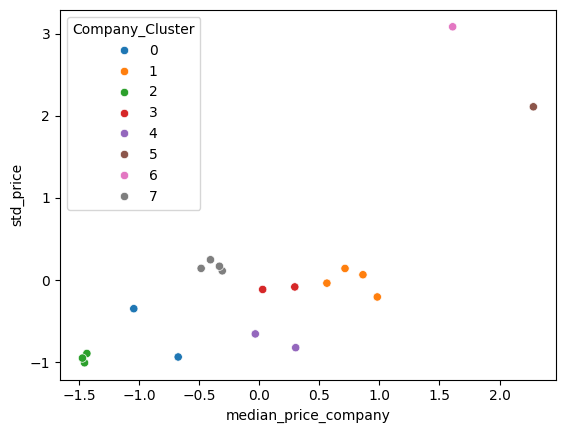

In [27]:
sns.scatterplot(df_grouped_cpu_agglo, x="median_price_company", y="std_price", hue="Company_Cluster", palette="tab10")

<Axes: xlabel='median_price_company', ylabel='company_proportion'>

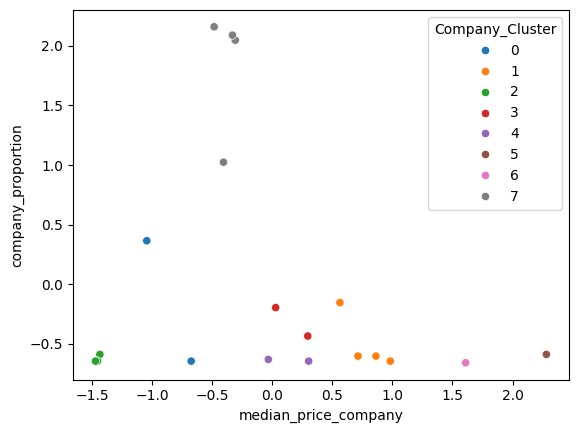

In [28]:
sns.scatterplot(df_grouped_cpu_agglo, x="median_price_company", y="company_proportion", hue="Company_Cluster", palette="tab10")

<Axes: xlabel='Price_in_euros', ylabel='Count'>

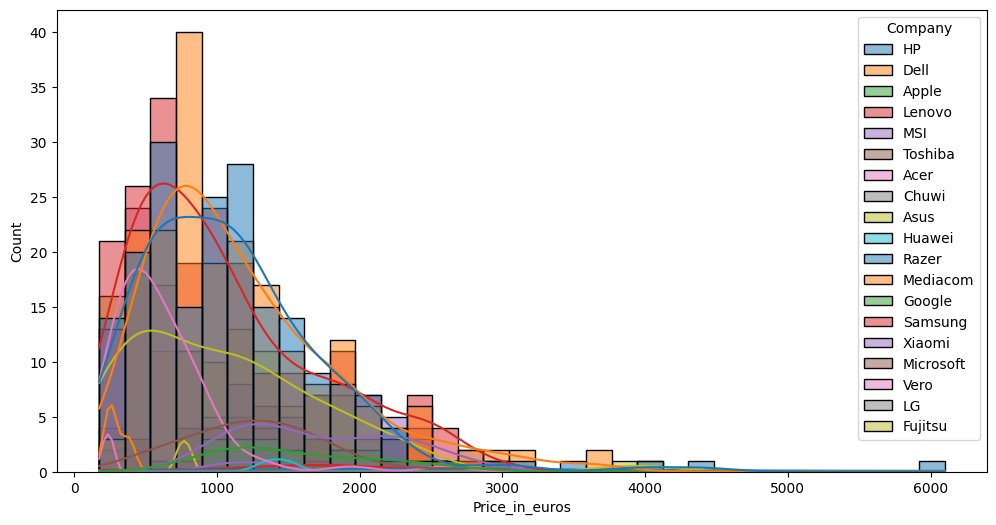

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(df, x=target, hue="Company", kde=True, palette="tab10")

<Axes: xlabel='Price_in_euros', ylabel='Count'>

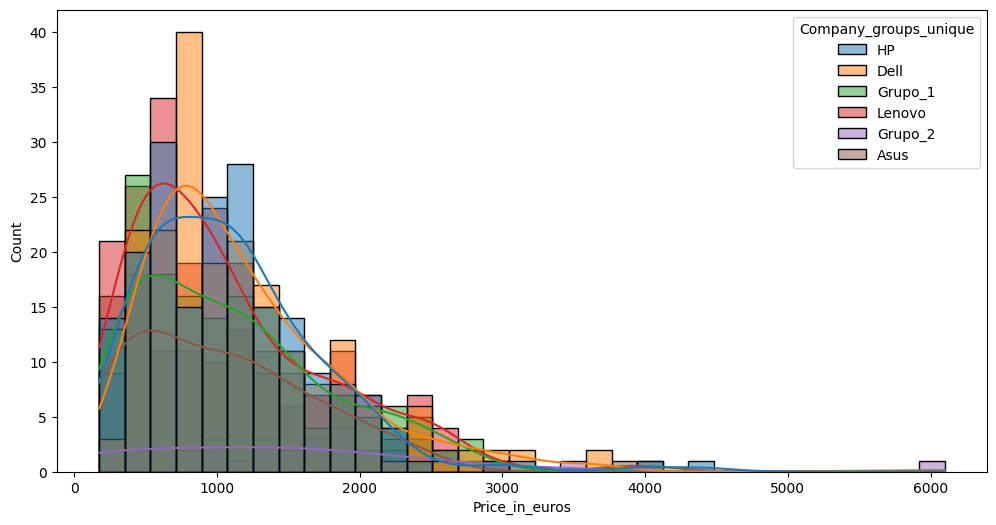

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(df, x=target, hue="Company_groups_unique", kde=True, palette="tab10")

<Axes: xlabel='Price_in_euros', ylabel='Count'>

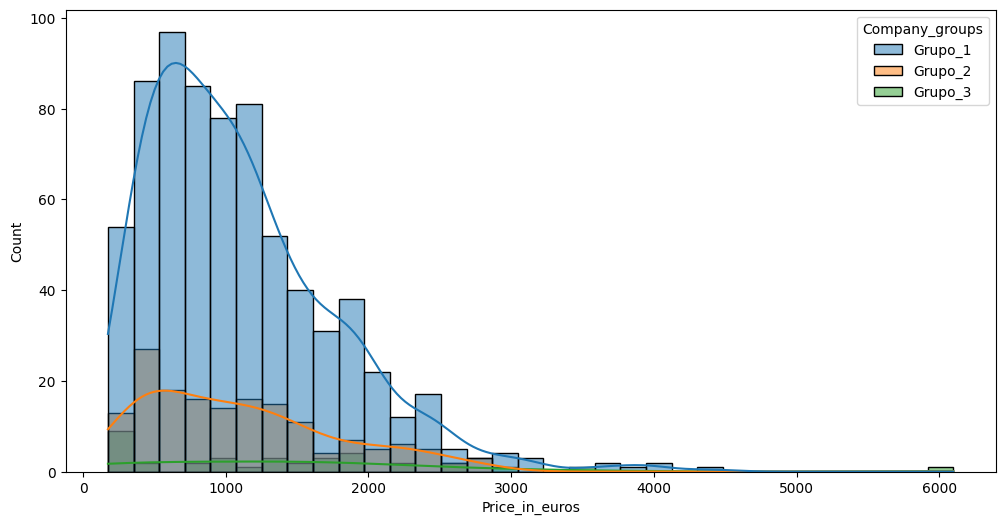

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df, x=target, hue="Company_groups", kde=True, palette="tab10")

<Axes: xlabel='Price_in_euros', ylabel='Count'>

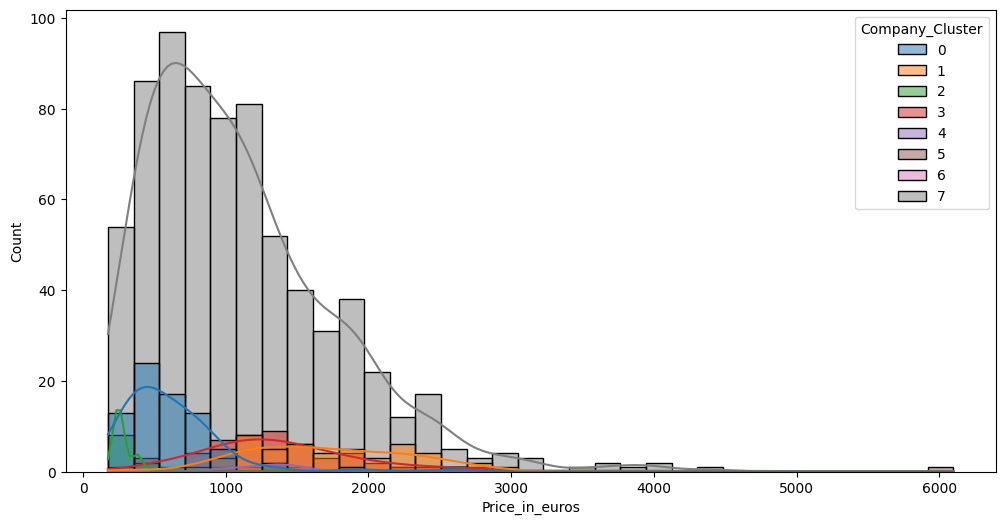

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df, x=target, hue="Company_Cluster", kde=True, palette="tab10")


## "`Product`"

### Se elimina

- Esta columna entera se va a borrar porque el nombre comercial del modelo no implica nada en el precio (si que implica, pero al final el nombre del modelo es la concatenacion de todas sus caracteristicas, por lo que sus caracterisitcas son las que determinaran el precio, no su nombre comercial).    
- Ademas su cardinalidad es altisima, no podemos transformala en nada sensanto.

In [33]:
df.drop(columns="Product", inplace=True)

### Para Test:

df2.drop(columns="Product", inplace=True)

## "`TypeName`"

### De 6 a 6

- Es una variable que tiene bastante peso sobre el precio, pero quiza este camuflado, al igual que product, en sus caracteristicas, pues son sus caracteristicas las que en gran medida te dicen que "tipo" de ordenador es.
- TypeName tiene solo 6 categorias, por lo que haremos un one-hot-encoder o similar sobre ella.
- Se probara con y si ella a ver los resultados.

In [34]:
df.TypeName.nunique()

6

In [35]:
df.TypeName.unique()

array(['Notebook', 'Gaming', 'Ultrabook', 'Workstation', 'Netbook',
       '2 in 1 Convertible'], dtype=object)

In [36]:
df.TypeName.value_counts(True)*100

TypeName
Notebook              55.811404
Gaming                15.679825
Ultrabook             15.460526
2 in 1 Convertible     8.771930
Workstation            2.192982
Netbook                2.083333
Name: proportion, dtype: float64

In [37]:
df_typename_median = df.groupby("TypeName", as_index=False)["Price_in_euros"].median()
df_typename_median.rename({"Price_in_euros":"median_price_typename"}, axis=1,inplace=True)
df_typename_median

,TypeName,median_price_typename
0,2 in 1 Convertible,1378.495
1,Gaming,1479.000
2,Netbook,295.000
3,Notebook,685.000
4,Ultrabook,1499.000
5,Workstation,1984.000


In [38]:
df["TypeName"] = df["TypeName"].astype("category")

# Para test

df2["TypeName"] = df2["TypeName"].astype("category")


## `"Inches"`

### De 17 a 9

- Ya se ha transformado a numerica.
- Habria que hacer grupos para tener menos categorias.    

In [39]:
df.Inches.nunique()

17

In [40]:
df.Inches.value_counts(True)*100

Inches
15.6    49.671053
14.0    16.447368
13.3    12.500000
17.3    12.390351
11.6     3.070175
12.5     2.960526
13.5     0.548246
12.0     0.438596
15.0     0.328947
13.9     0.328947
15.4     0.328947
10.1     0.219298
13.0     0.219298
12.3     0.219298
14.1     0.109649
11.3     0.109649
18.4     0.109649
Name: proportion, dtype: float64

## a) Nueva columna --> Inches_groups_unique (grupos segun el % de presencia en el data set, pero lo que tiene mas de 10% son ellos mismos el grupo)

In [41]:
company_percentages = df['Inches'].value_counts(normalize=True) * 100

# Crear una función para asignar los grupos según el porcentaje
def asignar_grupo_modificado(percent, company):
    if percent > 10:
        return company.astype(str)  # Mantener el nombre de la marca
    elif percent > 1 and percent <= 10:
        return "Grupo_1"  # Grupo de marcas entre 1% y 10%
    else:
        return "Grupo_2"  # Grupo de marcas con menos del 1%

# Crear una nueva columna 'Company_groups' asignando los grupos según el porcentaje
df['Inches_groups_unique'] = df['Inches'].map(company_percentages).combine(df['Inches'], asignar_grupo_modificado).astype("category")

# Ver el DataFrame actualizado
df.head()

,laptop_ID,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros,ram_gb,weight_kg,Company_groups_unique,Company_groups,Company_Cluster,Inches_groups_unique
0,755,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00,8,1.86,HP,Grupo_1,7,15.6
1,618,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01,16,2.59,Dell,Grupo_1,7,15.6
2,909,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00,8,2.04,HP,Grupo_1,7,15.6
3,2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,8,1.34,Grupo_1,Grupo_2,3,13.3
4,286,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00,4,2.25,Dell,Grupo_1,7,15.6


In [42]:
# Para Test

df2['Inches_groups_unique'] = df2['Inches'].map(company_percentages).combine(df['Inches'], asignar_grupo_modificado).astype("category")


df2.head()

,laptop_ID,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,ram_gb,weight_kg,Company_groups_unique,Company_groups,Company_Cluster,Inches_groups_unique
0,209,Lenovo,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.4kg,16,2.400,Lenovo,Grupo_1,7,15.6
1,1281,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,4,2.400,Grupo_1,Grupo_2,0,15.6
2,1168,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,Intel HD Graphics 520,No OS,1.9kg,4,1.900,Lenovo,Grupo_1,7,15.6
3,1231,Dell,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.191kg,8,2.191,Dell,Grupo_1,7,13.3
4,1020,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg,4,1.950,HP,Grupo_1,7,15.6


## b) Nueva columna --> Inches_cluster (usando cluster aglomerativo y medidas estadisticas respecto al precio)

In [43]:
# Agrupar por 'Inches' y calcular la media, mediana y desviación estándar de 'Price_in_euros'
df_grouped_inches = df.groupby('Inches')['Price_in_euros'].agg(mean_price='mean', median_price_inch='median', std_price='std')

# Reemplazar valores NaN en 'std_price' con el valor de 'median_price_inch'
df_grouped_inches['std_price'] = df_grouped_inches.apply(
    lambda row: row['median_price_inch'] if pd.isna(row['std_price']) else row['std_price'],
    axis=1
)

# Reemplazar solo los valores NaN en 'median_price_inch' con los valores correspondientes de 'mean_price'
df_grouped_inches['median_price_inch'] = df_grouped_inches['median_price_inch'].fillna(df_grouped_inches['mean_price'])

# # Calcular la razón entre la mediana y la desviación estándar
# df_grouped_inches['ratio_median_std'] = df_grouped_inches['median_price_inch'] / df_grouped_inches['std_price']

# Calcular el porcentaje de representatividad de cada tamaño de pantalla (Inches)
inches_proportion = df['Inches'].value_counts(normalize=True) * 100

# Añadir el porcentaje al DataFrame agrupado
df_grouped_inches['inches_proportion'] = inches_proportion

# Ordenar por la razón entre mediana y desviación estándar en orden descendente
df_grouped_inches = df_grouped_inches.sort_values(by="median_price_inch", ascending=False)

# Ver el DataFrame actualizado
df_grouped_inches


,mean_price,median_price_inch,std_price,inches_proportion
Inches,,,,
18.4,2799.000000,2799.000,2799.000000,0.109649
15.4,2372.463333,2439.970,207.160445,0.328947
12.3,1879.000000,1879.000,452.548340,0.219298
13.9,1849.000000,1849.000,250.000000,0.328947
13.5,1716.970000,1799.000,604.561146,0.548246
15.0,1335.666667,1699.000,717.658229,0.328947
12.5,1551.195556,1539.000,431.937544,2.960526
13.0,1424.000000,1424.000,106.066017,0.219298
17.3,1689.128761,1409.000,983.294868,12.390351


In [44]:
from sklearn.preprocessing import StandardScaler

# Seleccionar solo las columnas numéricas
X = df_grouped_inches.select_dtypes(include=[float, int])

# Crear el objeto StandardScaler
scaler = StandardScaler()

# Ajustar y transformar los datos
X_scaled = scaler.fit_transform(X)

# Convertir el resultado en un DataFrame con las mismas columnas e índice
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=df_grouped_inches.index)

# Ver el DataFrame estandarizado
X_scaled_df

,mean_price,median_price_inch,std_price,inches_proportion
Inches,,,,
18.4,2.184552,2.117509,3.480441,-0.478094
15.4,1.518424,1.574550,-0.639621,-0.459932
12.3,0.747776,0.726198,-0.249546,-0.469013
13.9,0.700925,0.680829,-0.571522,-0.459932
13.5,0.494732,0.605215,-0.007902,-0.441770
15.0,-0.100755,0.453985,0.171880,-0.459932
12.5,0.235840,0.212018,-0.282309,-0.241985
13.0,0.037197,0.038104,-0.800324,-0.469013
17.3,0.451252,0.015420,0.594144,0.538991


In [45]:
from sklearn.cluster import AgglomerativeClustering

# Instanciar el modelo Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=5, linkage='ward')

# Ajustar el modelo y predecir los clusters
agglo_clusters = agglo.fit_predict(X_scaled_df[["median_price_inch", "std_price", "inches_proportion"]])

# Añadir las etiquetas de cluster al DataFrame original
df_grouped_inches['Inches_Cluster'] = agglo_clusters

# Ver los clusters generados
print(df_grouped_inches[['Inches_Cluster']].sort_values(by="Inches_Cluster"))

        Inches_Cluster
Inches                
17.3                 0
13.3                 0
11.3                 0
14.0                 0
15.4                 1
12.3                 1
13.9                 1
13.5                 1
15.0                 1
12.5                 1
13.0                 1
12.0                 1
15.6                 2
18.4                 3
10.1                 4
14.1                 4
11.6                 4


In [46]:
df = df.merge(df_grouped_inches[['Inches_Cluster']], on='Inches', how='left')
df['Inches_Cluster'] = df['Inches_Cluster'].astype("category")

df.head()

,laptop_ID,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros,ram_gb,weight_kg,Company_groups_unique,Company_groups,Company_Cluster,Inches_groups_unique,Inches_Cluster
0,755,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00,8,1.86,HP,Grupo_1,7,15.6,2
1,618,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01,16,2.59,Dell,Grupo_1,7,15.6,2
2,909,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00,8,2.04,HP,Grupo_1,7,15.6,2
3,2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,8,1.34,Grupo_1,Grupo_2,3,13.3,0
4,286,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00,4,2.25,Dell,Grupo_1,7,15.6,2


In [47]:
# Para Test

df2 = df2.merge(df_grouped_inches[['Inches_Cluster']], on='Inches', how='left')

df2["Inches_Cluster"] = df2["Inches_Cluster"].fillna("otros")
df2['Inches_Cluster'] = df2['Inches_Cluster'].astype("category")

df2.head()

,laptop_ID,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,ram_gb,weight_kg,Company_groups_unique,Company_groups,Company_Cluster,Inches_groups_unique,Inches_Cluster
0,209,Lenovo,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.4kg,16,2.400,Lenovo,Grupo_1,7,15.6,2.0
1,1281,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,4,2.400,Grupo_1,Grupo_2,0,15.6,2.0
2,1168,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,Intel HD Graphics 520,No OS,1.9kg,4,1.900,Lenovo,Grupo_1,7,15.6,2.0
3,1231,Dell,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.191kg,8,2.191,Dell,Grupo_1,7,13.3,2.0
4,1020,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg,4,1.950,HP,Grupo_1,7,15.6,0.0


<Axes: xlabel='Price_in_euros', ylabel='Count'>

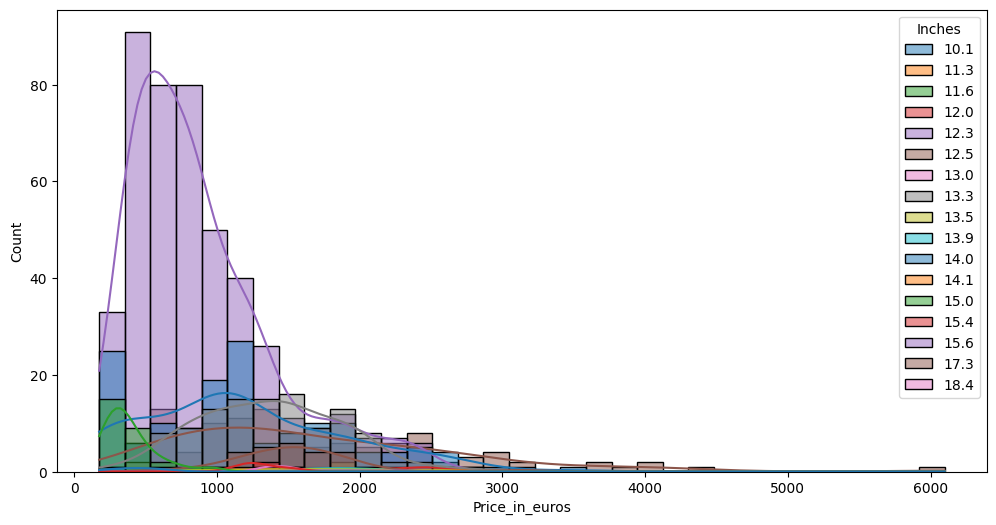

In [48]:
plt.figure(figsize=(12,6))
sns.histplot(df, x=target, hue="Inches", kde=True, palette="tab10")

<Axes: xlabel='Price_in_euros', ylabel='Count'>

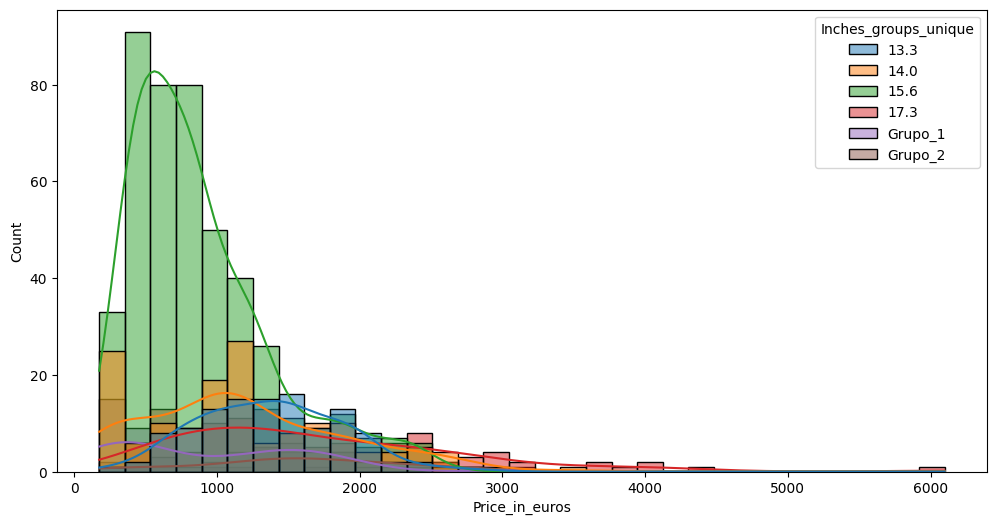

In [49]:
plt.figure(figsize=(12,6))
sns.histplot(df, x=target, hue="Inches_groups_unique", kde=True, palette="tab10")

<Axes: xlabel='Price_in_euros', ylabel='Count'>

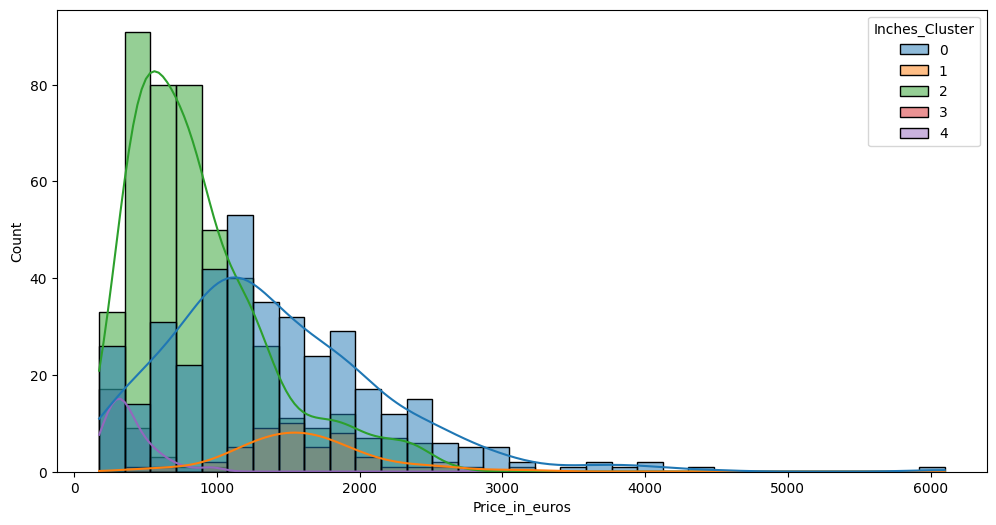

In [50]:
plt.figure(figsize=(12,6))
sns.histplot(df, x=target, hue="Inches_Cluster", kde=True, palette="tab10")

## `"ScreenResolution"`

### De 36 a 14
### De 14 a 6

La feature ScreenResolution tiene demasiados valores unicos para ser usada sin hacerle nada más, ademas, mucha de la información es la misma pero escrita de maneras diferentes, por lo que no seria nada beneficioso para el modelo tener dos categorias que señalaran a lo mismo dentro de una misma feature.

Por tal motivo vamos a buscar de que manera sacar la informacion relevante, a la vez que se crearan nuevas columnas que la almacenen.

La resolucion de la pantalla es la que determina la definicion de imagen que podras ver en ella (sin contar la tecnologia del panel en si) y siempre, una misma resolucion equivale a un mismo nombre comercial.    
Es decir, Full HD es siempre 1920 x 1080 pixeles y Ultra HD (o 4K) 3840 x 1440 pixeles, por lo que se puede usar este valor numerico para crear nuevas columnas con informacion mas clara (y numerica) y limpiar el data set.    

Otro punto importante seria saber la tecnologia del panel, pero no es posible con la descripción que se da. Solo se mencionan las de tecnologia IPS, pero no sabemos nada del resto.    

Por lo tanto se va a extraer la resoluciond de la pantalla (ejemplo, 1920 x 1080) y se multiplicara (2073600 pixeles) para tener un nímero comparable y facil de usar para el modelo.

In [51]:
df.ScreenResolution.nunique()

36

In [52]:
df.ScreenResolution.unique()

array(['Full HD 1920x1080', '1440x900', '1366x768',
       'IPS Panel Full HD 1920x1080', 'IPS Panel 4K Ultra HD 3840x2160',
       'IPS Panel Retina Display 2560x1600', 'Touchscreen 1366x768',
       'IPS Panel Quad HD+ 2560x1440', 'IPS Panel 1366x768',
       'Full HD / Touchscreen 1920x1080', 'IPS Panel Full HD 2160x1440',
       'Quad HD+ 3200x1800', '4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'IPS Panel Touchscreen 1920x1200',
       'IPS Panel Touchscreen 2560x1440', 'Touchscreen 2400x1600',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2560x1440', 'Quad HD+ / Touchscreen 3200x1800',
       '4K Ultra HD 3840x2160',
       'IPS Panel Quad HD+ / Touchscreen 3200x1800',
       'Touchscreen 2256x1504', '1600x900',
       'IPS Panel Touchscreen 1366x768',
       'Touchscreen / Quad HD+ 3200x1800', 'IPS Panel 2560x1440',
       'IPS Panel Quad HD+ 3200x

>### Función para extraer la resolución    
>### Función para obtener los pixeles totales (multiplicación)    
>### Función que busca la caracteristica touchscreen    

In [53]:
# Función para extraer el tipo de resolución (ejemplo: '1920x1080')
def extract_resolution_type(resolution):
    match = re.search(r'(\d{3,4}x\d{3,4})', resolution)
    return match.group(1) if match else None

# Función para calcular el producto del ancho x alto (ejemplo: 1920 * 1080)
def calculate_resolution_pixels(resolution):
    match = re.search(r'(\d{3,4})x(\d{3,4})', resolution)
    if match:
        width, height = int(match.group(1)), int(match.group(2))
        return width * height
    return None

# Función para verificar si es Touchscreen o no
def is_touchscreen(resolution):
    return 1 if 'touchscreen' in resolution.lower() else 0


In [54]:
# Aplicar las funciones a la columna 'ScreenResolution'
df['Resolution_Type'] = df['ScreenResolution'].apply(extract_resolution_type)
df['Resolution_Pixels'] = df['ScreenResolution'].apply(calculate_resolution_pixels)
df['Touchscreen'] = df['ScreenResolution'].apply(is_touchscreen)

### Para Test:

df2['Resolution_Type'] = df2['ScreenResolution'].apply(extract_resolution_type)
df2['Resolution_Pixels'] = df2['ScreenResolution'].apply(calculate_resolution_pixels)
df2['Touchscreen'] = df2['ScreenResolution'].apply(is_touchscreen)

# Ver las primeras filas para verificar
df[['ScreenResolution', 'Resolution_Type', 'Resolution_Pixels', 'Touchscreen']].head()

,ScreenResolution,Resolution_Type,Resolution_Pixels,Touchscreen
0,Full HD 1920x1080,1920x1080,2073600,0
1,Full HD 1920x1080,1920x1080,2073600,0
2,Full HD 1920x1080,1920x1080,2073600,0
3,1440x900,1440x900,1296000,0
4,Full HD 1920x1080,1920x1080,2073600,0


In [55]:
df.Resolution_Pixels.nunique()

14

In [56]:
df.Resolution_Pixels.unique()

array([2073600, 1296000, 1049088, 8294400, 4096000, 3686400, 3110400,
       5760000, 3317760, 2304000, 3840000, 3393024, 1440000, 5184000],
      dtype=int64)

- La trataremos como numerica discreta, aunque si que pueden haver infinitos valores entre sus datos (no los hay porque las resoluciones son fijas).    
- Aqui los numeros si que son proporcionales a la calidad de la imagen.    
- Se extrae tambien la columna Touchscreen por si fuera de utilidad.

## `"Cpu"`

In [57]:
df.Cpu.unique()

array(['Intel Core i3 6006U 2GHz', 'Intel Core i7 6700HQ 2.6GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i3 6006U 2.0GHz', 'Intel Core i5 7300U 2.6GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i3 7100U 2.4GHz',
       'Intel Core i7 7700HQ 2.8GHz', 'Intel Core i7 7600U 2.8GHz',
       'Intel Core i5 2.9GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Core i7 6500U 2.5GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Celeron Quad Core N3710 1.6GHz',
       'Intel Celeron Dual Core N3060 1.6GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'Intel Core i5 7300HQ 2.5GHz',
       'Intel Pentium Quad Core N3710 1.6GHz',
       'Intel Core i5 6200U 2.3GHz', 'Intel Core i5 8250U 1.6GHz',
       'AMD Ryzen 1700 3GHz', 'Intel Core i7 7820HK 2.9GHz',
       'Intel Core i5 1.3GHz', 'Intel Pentium Quad Core N3700 1.6GHz',
       'AMD A9-Series A9-9420 3GHz', 'Intel Core i7 7560U 2.4GHz',
       'Intel Core i

>### Función para extraer el fabricante, el modelo y la frecuencia del procesador    

In [58]:
def extract_cpu_info(cpu):
    # Ajustar el patrón de regex para extraer el fabricante (primera palabra), modelo (medio) y frecuencia (última parte)
    match = re.match(r'^(\w+)\s+(.*?)(\s+(\d+(?:\.\d+)?))(GHz)?$', cpu)
    if match:
        manufacturer = match.group(1)  # Primera palabra del string como fabricante
        model = match.group(2).strip()  # El modelo entre el fabricante y la frecuencia
        frequency = float(match.group(4)) if match.group(4) else None  # Convertir la frecuencia a float
        return manufacturer, model, frequency
    return None, None, None

# Aplicar la función a la columna 'Cpu'
df[['CPU_Manufacturer', 'CPU_Model', 'CPU_Frequency']] = df['Cpu'].apply(lambda x: pd.Series(extract_cpu_info(x)))

### Para Test:

df2[['CPU_Manufacturer', 'CPU_Model', 'CPU_Frequency']] = df2['Cpu'].apply(lambda x: pd.Series(extract_cpu_info(x)))

In [59]:
# Función para clasificar los modelos
def classify_model(model):
    if "Core i" in model:
        if "Core i3" in model:
            return "i3"
        if "Core i5" in model:
            return "i5"
        if "Core i7" in model:
            return "i7"
        if "Core i9" in model:
            return "i9"
    
    elif "Pentium" in model:
        if "Dual" in model:
            return "Pentium Dual Core"
        if "Quad" in model:
            return "Pentium Quad Core"
        
    elif "Atom" in model:
        return "Atom"
    elif "Celeron" in model:
        return "Celeron"
    elif "Core M" in model:
        return "Core M"
    elif "Xeon" in model:
        return "Xeon"
    elif "Ryzen" in model:
        return "Ryzen"
    elif "A" in model:
        return "A"
    elif "E" in model:
        return "E"
    elif "FX" in model:
        return "FX"
    else:
        return "Otros"

# Aplicar la función a la columna 'Model' y crear una nueva columna 'Model_Class'
df['CPU_Model_Type'] = df['CPU_Model'].apply(classify_model)

### Para Test:

df2['CPU_Model_Type'] = df2['CPU_Model'].apply(classify_model)

# Verificar los resultados
df[['CPU_Model', 'CPU_Model_Type']].head()


,CPU_Model,CPU_Model_Type
0,Core i3 6006U,i3
1,Core i7 6700HQ,i7
2,Core i7 7500U,i7
3,Core i5,i5
4,Core i3 6006U,i3


In [60]:
df.CPU_Model_Type.value_counts(normalize=True)*100

CPU_Model_Type
i7                   41.008772
i5                   30.921053
i3                   10.197368
Celeron               7.675439
A                     3.399123
Pentium Quad Core     2.302632
Core M                1.644737
Atom                  1.096491
E                     0.767544
Ryzen                 0.328947
Pentium Dual Core     0.328947
Xeon                  0.219298
FX                    0.109649
Name: proportion, dtype: float64

In [61]:
# Agrupar por 'CPU_model_Type' y calcular la media, mediana y desviación estándar de 'Price_in_euros'
df_grouped_cpu = df.groupby('CPU_Model_Type')['Price_in_euros'].agg(mean_price='mean', median_price_cpu='median', std_price='std')

# Reemplazar valores NaN en 'std_price' con el valor de 'median_price_cpu'
df_grouped_cpu['std_price'] = df_grouped_cpu.apply(
    lambda row: row['median_price_cpu'] /100 if pd.isna(row['std_price'])/10 else row['std_price']/10,
    axis=1
)

# Reemplazar solo los valores NaN en 'median_price_cpu' con los valores correspondientes de 'mean_price'
df_grouped_cpu['median_price_cpu'] = df_grouped_cpu['median_price_cpu'].fillna(df_grouped_cpu['mean_price'])

# Calcular la razón entre la mediana y la desviación estándar
#df_grouped_cpu['ratio_median_std'] = df_grouped_cpu['median_price_cpu'] / df_grouped_cpu['std_price']

# Calcular el porcentaje de representatividad de cada 'CPU_model_Type'
cpu_proportion = df['CPU_Model_Type'].value_counts(normalize=True) * 100

# Añadir el porcentaje al DataFrame agrupado
# df_grouped_cpu['cpu_proportion'] = cpu_proportion

# Ordenar por la razón entre mediana y desviación estándar en orden descendente
df_grouped_cpu = df_grouped_cpu.sort_values(by="median_price_cpu", ascending=False)

# Ver el DataFrame actualizado
df_grouped_cpu



,mean_price,median_price_cpu,std_price
CPU_Model_Type,,,
Xeon,3191.000000,3191.00,169.422785
Ryzen,1731.000000,1695.00,45.107871
i7,1583.536417,1472.50,68.940097
Core M,1337.226667,1262.40,65.539053
i5,1012.285638,959.00,35.880268
FX,699.000000,699.00,6.990000
Pentium Dual Core,565.300000,581.90,5.975508
i3,547.838065,499.00,15.242198
A,501.747097,478.89,14.247190


In [62]:
from sklearn.preprocessing import StandardScaler

# Seleccionar solo las columnas numéricas
X = df_grouped_cpu.select_dtypes(include=[float, int])

# Crear el objeto StandardScaler
scaler = StandardScaler()

# Ajustar y transformar los datos
X_scaled = scaler.fit_transform(X)

# Convertir el resultado en un DataFrame con las mismas columnas e índice
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=df_grouped_cpu.index)

# Ver el DataFrame estandarizado
X_scaled_df

,mean_price,median_price_cpu,std_price
CPU_Model_Type,,,
Xeon,2.788548,2.848567,3.022486
Ryzen,0.963882,0.962797,0.217223
i7,0.779586,0.682327,0.755016
Core M,0.471755,0.417487,0.678269
i5,0.065653,0.035039,0.008995
FX,-0.325882,-0.292702,-0.642936
Pentium Dual Core,-0.492976,-0.440311,-0.665829
i3,-0.514800,-0.544810,-0.456719
A,-0.572403,-0.570159,-0.479172


In [63]:
from sklearn.cluster import AgglomerativeClustering

# Instanciar el modelo Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=4, linkage='ward')

# Ajustar el modelo y predecir los clusters
agglo_clusters = agglo.fit_predict(X_scaled_df[["median_price_cpu",	"std_price"]])

# Añadir las etiquetas de cluster al DataFrame original
df_grouped_cpu['CPU_Cluster'] = agglo_clusters

# Ver los clusters generados
print(df_grouped_cpu[['CPU_Cluster']].sort_values(by="CPU_Cluster"))

                   CPU_Cluster
CPU_Model_Type                
Ryzen                        0
i7                           0
Core M                       0
i5                           1
FX                           2
Pentium Dual Core            2
i3                           2
A                            2
Pentium Quad Core            2
E                            2
Celeron                      2
Atom                         2
Xeon                         3


In [64]:
df_grouped_cpu_agglo = X_scaled_df.merge(df_grouped_cpu[["CPU_Cluster"]],on="CPU_Model_Type", how= "left" )
df_grouped_cpu_agglo

,mean_price,median_price_cpu,std_price,CPU_Cluster
CPU_Model_Type,,,,
Xeon,2.788548,2.848567,3.022486,3
Ryzen,0.963882,0.962797,0.217223,0
i7,0.779586,0.682327,0.755016,0
Core M,0.471755,0.417487,0.678269,0
i5,0.065653,0.035039,0.008995,1
FX,-0.325882,-0.292702,-0.642936,2
Pentium Dual Core,-0.492976,-0.440311,-0.665829,2
i3,-0.514800,-0.544810,-0.456719,2
A,-0.572403,-0.570159,-0.479172,2


<Axes: xlabel='median_price_cpu', ylabel='std_price'>

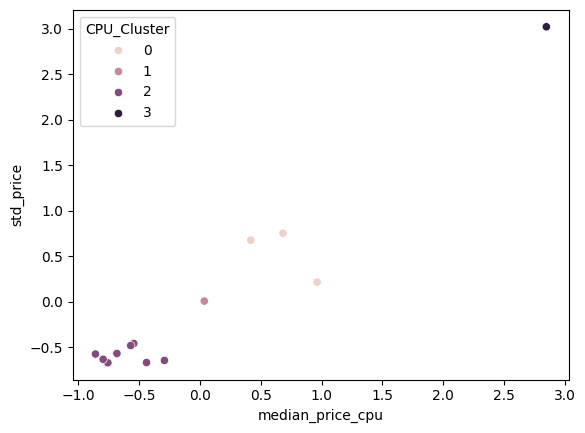

In [65]:
sns.scatterplot(df_grouped_cpu_agglo, x="median_price_cpu", y="std_price", hue="CPU_Cluster")

In [66]:
df = df.merge(df_grouped_cpu[['CPU_Cluster']], on='CPU_Model_Type', how='left')
df['CPU_Cluster'] = df['CPU_Cluster'].astype("category")

df.head()

,laptop_ID,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros,ram_gb,weight_kg,Company_groups_unique,Company_groups,Company_Cluster,Inches_groups_unique,Inches_Cluster,Resolution_Type,Resolution_Pixels,Touchscreen,CPU_Manufacturer,CPU_Model,CPU_Frequency,CPU_Model_Type,CPU_Cluster
0,755,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00,8,1.86,HP,Grupo_1,7,15.6,2,1920x1080,2073600,0,Intel,Core i3 6006U,2.0,i3,2
1,618,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01,16,2.59,Dell,Grupo_1,7,15.6,2,1920x1080,2073600,0,Intel,Core i7 6700HQ,2.6,i7,0
2,909,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00,8,2.04,HP,Grupo_1,7,15.6,2,1920x1080,2073600,0,Intel,Core i7 7500U,2.7,i7,0
3,2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,8,1.34,Grupo_1,Grupo_2,3,13.3,0,1440x900,1296000,0,Intel,Core i5,1.8,i5,1
4,286,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00,4,2.25,Dell,Grupo_1,7,15.6,2,1920x1080,2073600,0,Intel,Core i3 6006U,2.0,i3,2


In [67]:
# Para Test

df2 = df2.merge(df_grouped_cpu[['CPU_Cluster']], on='CPU_Model_Type', how='left')
df2['CPU_Cluster'] = df2['CPU_Cluster'].astype("category")

df2.head()

,laptop_ID,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,ram_gb,weight_kg,Company_groups_unique,Company_groups,Company_Cluster,Inches_groups_unique,Inches_Cluster,Resolution_Type,Resolution_Pixels,Touchscreen,CPU_Manufacturer,CPU_Model,CPU_Frequency,CPU_Model_Type,CPU_Cluster
0,209,Lenovo,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.4kg,16,2.400,Lenovo,Grupo_1,7,15.6,2.0,1920x1080,2073600,0,Intel,Core i7 7700HQ,2.8,i7,0
1,1281,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,4,2.400,Grupo_1,Grupo_2,0,15.6,2.0,1366x768,1049088,0,Intel,Celeron Dual Core N3060,1.6,Celeron,2
2,1168,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,Intel HD Graphics 520,No OS,1.9kg,4,1.900,Lenovo,Grupo_1,7,15.6,2.0,1366x768,1049088,0,Intel,Core i3 6006U,2.0,i3,2
3,1231,Dell,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.191kg,8,2.191,Dell,Grupo_1,7,13.3,2.0,1920x1080,2073600,1,Intel,Core i5 7200U,2.5,i5,1
4,1020,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg,4,1.950,HP,Grupo_1,7,15.6,0.0,1920x1080,2073600,0,Intel,Core i5 7200U,2.5,i5,1


<Axes: xlabel='Price_in_euros'>

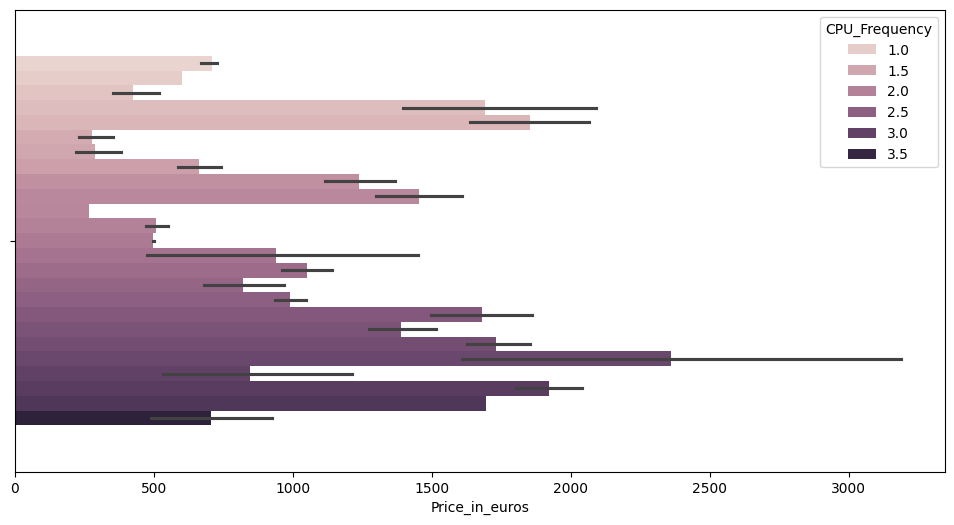

In [68]:
plt.figure(figsize=(12,6))
sns.barplot(df,x= target, hue="CPU_Frequency")

<Axes: xlabel='Price_in_euros', ylabel='Count'>

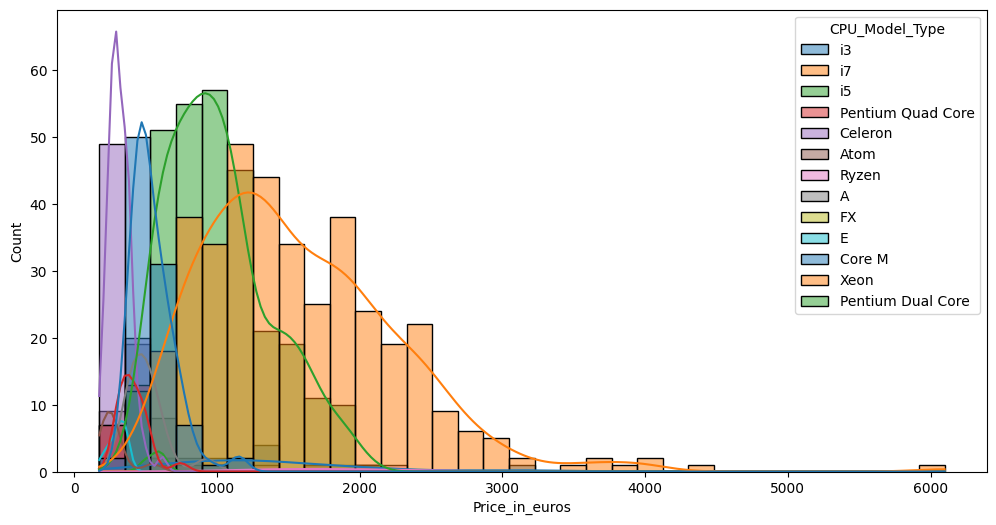

In [69]:
plt.figure(figsize=(12,6))
sns.histplot(df, x=target, hue="CPU_Model_Type", kde=True, palette="tab10")

<Axes: xlabel='Price_in_euros', ylabel='Count'>

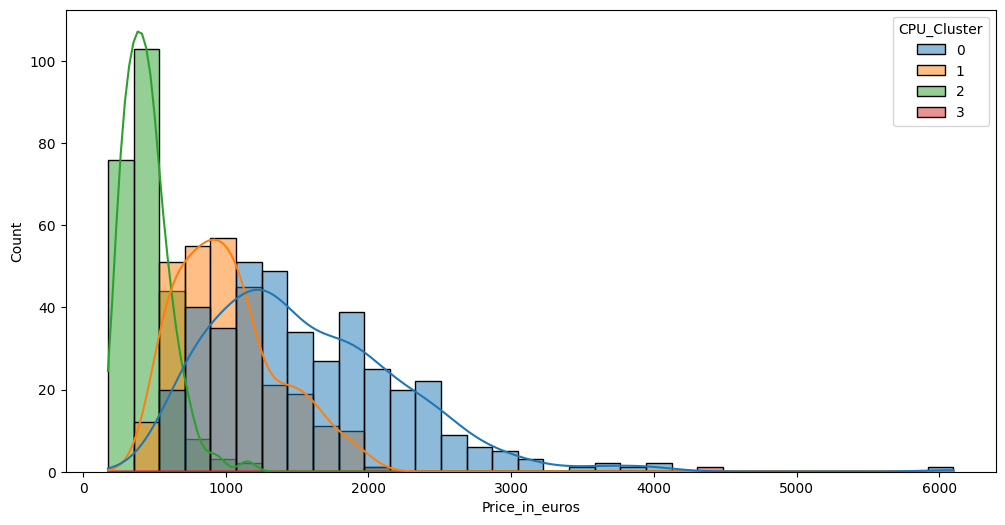

In [70]:
plt.figure(figsize=(12,6))
sns.histplot(df, x=target, hue="CPU_Cluster", kde=True, palette="tab10")

## `"Memory"`

In [71]:
df.Memory.unique()

array(['256GB SSD', '1TB HDD', '128GB Flash Storage',
       '128GB SSD +  1TB HDD', '512GB SSD', '500GB HDD',
       '256GB SSD +  256GB SSD', '128GB SSD', '32GB Flash Storage',
       '64GB Flash Storage', '1.0TB Hybrid', '2TB HDD',
       '256GB Flash Storage', '256GB SSD +  1TB HDD', '180GB SSD',
       '16GB Flash Storage', '1TB SSD', '256GB SSD +  2TB HDD',
       '32GB SSD', '1TB SSD +  1TB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  1TB HDD', '512GB SSD +  512GB SSD',
       '512GB SSD +  256GB SSD', '16GB SSD',
       '64GB Flash Storage +  1TB HDD', '64GB SSD', '128GB HDD',
       '240GB SSD', '512GB SSD +  2TB HDD', '508GB Hybrid', '8GB SSD',
       '256GB SSD +  500GB HDD', '1.0TB HDD', '512GB Flash Storage',
       '1TB HDD +  1TB HDD', '32GB HDD'], dtype=object)

>### Función para extraer los GB de capacidad y su tecnologia

In [72]:
# Inicializar nuevas columnas
df['SSD_(GB)'] = 0
df['HDD_(GB)'] = 0
df['Flash_Storage_(GB)'] = 0
df['Hybrid_(GB)'] = 0
df['OtherTypeStorage_(GB)'] = 0

### Para Test:

df2['SSD_(GB)'] = 0
df2['HDD_(GB)'] = 0
df2['Flash_Storage_(GB)'] = 0
df2['Hybrid_(GB)'] = 0
df2['OtherTypeStorage_(GB)'] = 0


# Función para extraer valores de almacenamiento
def extract_storage(memory):
    parts = re.split(r'\s*\+\s*', memory)

    # Inicializar variables para cada tipo de almacenamiento
    ssd_total = 0
    hdd_total = 0
    flash_total = 0
    hybrid_total = 0
    other_total = 0

    for part in parts:
        match = re.search(r'(\d+)(?:\.(\d+))?\s*(GB|TB)', part)
        
        if match:
            size = int(match.group(1))
            if match.group(3).upper() == 'TB':
                size *= 1024
            
            # Determinar la columna correspondiente
            if 'SSD' in part:
                ssd_total += size
            elif 'HDD' in part:
                hdd_total += size
            elif 'Flash Storage' in part:
                flash_total += size
            elif 'Hybrid' in part:
                hybrid_total += size
            else:
                other_total += size

    return pd.Series([ssd_total, hdd_total, flash_total, hybrid_total, other_total])


In [73]:
# Aplicar la función a la columna Memory
df[['SSD_(GB)', 'HDD_(GB)', 'Flash_Storage_(GB)', 'Hybrid_(GB)', 'OtherTypeStorage_(GB)']] = df['Memory'].apply(extract_storage)
df.head()

,laptop_ID,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros,ram_gb,weight_kg,Company_groups_unique,Company_groups,Company_Cluster,Inches_groups_unique,Inches_Cluster,Resolution_Type,Resolution_Pixels,Touchscreen,CPU_Manufacturer,CPU_Model,CPU_Frequency,CPU_Model_Type,CPU_Cluster,SSD_(GB),HDD_(GB),Flash_Storage_(GB),Hybrid_(GB),OtherTypeStorage_(GB)
0,755,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00,8,1.86,HP,Grupo_1,7,15.6,2,1920x1080,2073600,0,Intel,Core i3 6006U,2.0,i3,2,256,0,0,0,0
1,618,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01,16,2.59,Dell,Grupo_1,7,15.6,2,1920x1080,2073600,0,Intel,Core i7 6700HQ,2.6,i7,0,0,1024,0,0,0
2,909,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00,8,2.04,HP,Grupo_1,7,15.6,2,1920x1080,2073600,0,Intel,Core i7 7500U,2.7,i7,0,0,1024,0,0,0
3,2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,8,1.34,Grupo_1,Grupo_2,3,13.3,0,1440x900,1296000,0,Intel,Core i5,1.8,i5,1,0,0,128,0,0
4,286,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00,4,2.25,Dell,Grupo_1,7,15.6,2,1920x1080,2073600,0,Intel,Core i3 6006U,2.0,i3,2,0,1024,0,0,0


In [74]:
### Pata Test:

df2[['SSD_(GB)', 'HDD_(GB)', 'Flash_Storage_(GB)', 'Hybrid_(GB)', 'OtherTypeStorage_(GB)']] = df['Memory'].apply(extract_storage)
df2.head()

,laptop_ID,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,ram_gb,weight_kg,Company_groups_unique,Company_groups,Company_Cluster,Inches_groups_unique,Inches_Cluster,Resolution_Type,Resolution_Pixels,Touchscreen,CPU_Manufacturer,CPU_Model,CPU_Frequency,CPU_Model_Type,CPU_Cluster,SSD_(GB),HDD_(GB),Flash_Storage_(GB),Hybrid_(GB),OtherTypeStorage_(GB)
0,209,Lenovo,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.4kg,16,2.400,Lenovo,Grupo_1,7,15.6,2.0,1920x1080,2073600,0,Intel,Core i7 7700HQ,2.8,i7,0,256,0,0,0,0
1,1281,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,4,2.400,Grupo_1,Grupo_2,0,15.6,2.0,1366x768,1049088,0,Intel,Celeron Dual Core N3060,1.6,Celeron,2,0,1024,0,0,0
2,1168,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,Intel HD Graphics 520,No OS,1.9kg,4,1.900,Lenovo,Grupo_1,7,15.6,2.0,1366x768,1049088,0,Intel,Core i3 6006U,2.0,i3,2,0,1024,0,0,0
3,1231,Dell,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.191kg,8,2.191,Dell,Grupo_1,7,13.3,2.0,1920x1080,2073600,1,Intel,Core i5 7200U,2.5,i5,1,0,0,128,0,0
4,1020,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg,4,1.950,HP,Grupo_1,7,15.6,0.0,1920x1080,2073600,0,Intel,Core i5 7200U,2.5,i5,1,0,1024,0,0,0


## `"GPUs"`

- Analizando bien las tarjetas, creo que es muy importante diferenciar las dedicas y las no dedicadas.
- Me refiero a las que estan dentro de la propia CPU o las que en si mismas tiene su propia CPU (GPU) y por lo tanto su rendimiento es muhco mayor, ya que no usan recursos compartidos con la CPU.
- Intel solo fabria integradas, Nvidia solo fabrica externas y el unico que si que fabrica de las dos es AMD.
- Se ha buscado como identificar las tarjetas internas y externas de AMD:

    - Si llevan RX, Pro o M en su nombre, son tarjetas dedicadas.

In [75]:
# Si no se ejecuta esta celda, se vera como habia una tarjeta gráfica con los datos incorrectos para su procesado.

df.loc[661, "Gpu"] = 'AMD Radeon R7 M530'

In [76]:
df.Gpu.unique()

array(['Intel HD Graphics 520', 'Nvidia GeForce GTX 960<U+039C>',
       'Nvidia GeForce 930MX', 'Intel HD Graphics 6000',
       'AMD Radeon R5 M430', 'Intel HD Graphics 620',
       'Nvidia GeForce 940MX', 'Nvidia GeForce GTX 1050 Ti',
       'Intel Iris Graphics 550', 'Intel HD Graphics 505',
       'Intel UHD Graphics 620', 'Intel HD Graphics 405',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce GTX 960M',
       'Intel HD Graphics 400', 'AMD Radeon R7 M445',
       'AMD Radeon R7 M460', 'Intel HD Graphics', 'AMD FirePro W6150M',
       'Nvidia GeForce GTX 1050', 'Nvidia Quadro M1200',
       'AMD Radeon RX 580', 'Nvidia GeForce GTX 1080',
       'AMD Radeon R5 M330', 'Nvidia GeForce GTX 1070',
       'Intel HD Graphics 615', 'AMD Radeon 530', 'AMD Radeon 520',
       'Nvidia Quadro M620', 'Intel Iris Plus Graphics 640',
       'Nvidia Quadro M500M', 'Intel HD Graphics 510',
       'Intel Iris Plus Graphics 650', 'Nvidia GeForce 920MX ',
       'Intel HD Graphics 500', 'AMD Radeo

>### Extracción el fabricante y el modelo de las tarjetas gráficas.

In [77]:
# Crear las nuevas columnas sin una función
df['Gpu_Company'] = df['Gpu'].apply(lambda x: x.split()[0])
df['Gpu_Model'] = df['Gpu'].apply(lambda x: x.split()[1])   


# Aplicar lo mismo para el conjunto de test (df2)
df2['Gpu_Company'] = df2['Gpu'].apply(lambda x: x.split()[0])
df2['Gpu_Model'] = df2['Gpu'].apply(lambda x: x.split()[1])


# Verificar los resultados
df.head()

,laptop_ID,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros,ram_gb,weight_kg,Company_groups_unique,Company_groups,Company_Cluster,Inches_groups_unique,Inches_Cluster,Resolution_Type,Resolution_Pixels,Touchscreen,CPU_Manufacturer,CPU_Model,CPU_Frequency,CPU_Model_Type,CPU_Cluster,SSD_(GB),HDD_(GB),Flash_Storage_(GB),Hybrid_(GB),OtherTypeStorage_(GB),Gpu_Company,Gpu_Model
0,755,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00,8,1.86,HP,Grupo_1,7,15.6,2,1920x1080,2073600,0,Intel,Core i3 6006U,2.0,i3,2,256,0,0,0,0,Intel,HD
1,618,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01,16,2.59,Dell,Grupo_1,7,15.6,2,1920x1080,2073600,0,Intel,Core i7 6700HQ,2.6,i7,0,0,1024,0,0,0,Nvidia,GeForce
2,909,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00,8,2.04,HP,Grupo_1,7,15.6,2,1920x1080,2073600,0,Intel,Core i7 7500U,2.7,i7,0,0,1024,0,0,0,Nvidia,GeForce
3,2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,8,1.34,Grupo_1,Grupo_2,3,13.3,0,1440x900,1296000,0,Intel,Core i5,1.8,i5,1,0,0,128,0,0,Intel,HD
4,286,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00,4,2.25,Dell,Grupo_1,7,15.6,2,1920x1080,2073600,0,Intel,Core i3 6006U,2.0,i3,2,0,1024,0,0,0,AMD,Radeon


In [78]:
df.groupby(["Gpu_Company", "Gpu_Model"])["Gpu_Model"].count()

Gpu_Company  Gpu_Model
AMD          FirePro        4
             R4             1
             Radeon       114
Intel        Graphics       1
             HD           444
             Iris          12
             UHD           52
Nvidia       GTX            1
             GeForce      264
             Quadro        19
Name: Gpu_Model, dtype: int64

In [79]:
filtro_AMD = (df.Gpu_Company == "AMD") & (df.Gpu_Model != "Radeon") & (df.Gpu_Model != "FirePro")
df.loc[filtro_AMD,"Gpu_Model"] = "Radeon"

filtro_Intel = (df.Gpu_Company == "Intel") & (df.Gpu_Model != "HD") & (df.Gpu_Model != "Iris") & (df.Gpu_Model != "UHD")
df.loc[filtro_Intel,"Gpu_Model"] = "HD"

filtro_Nvidia = (df.Gpu_Company == "Nvidia") & (df.Gpu_Model != "GeForce") & (df.Gpu_Model != "Quadro")
df.loc[filtro_Nvidia,"Gpu_Model"] = "GeForce"

In [80]:
df.groupby(["Gpu_Company", "Gpu_Model"])["Gpu_Model"].count()

Gpu_Company  Gpu_Model
AMD          FirePro        4
             Radeon       115
Intel        HD           445
             Iris          12
             UHD           52
Nvidia       GeForce      265
             Quadro        19
Name: Gpu_Model, dtype: int64

In [81]:
df.Gpu_Model.value_counts(normalize=True)*100


Gpu_Model
HD         48.793860
GeForce    29.057018
Radeon     12.609649
UHD         5.701754
Quadro      2.083333
Iris        1.315789
FirePro     0.438596
Name: proportion, dtype: float64

In [82]:
filtro_AMD = (df2.Gpu_Company == "AMD") & (df2.Gpu_Model != "Radeon") & (df2.Gpu_Model != "FirePro")
df2.loc[filtro_AMD,"Gpu_Model"] = "Radeon"

filtro_Intel = (df2.Gpu_Company == "Intel") & (df2.Gpu_Model != "HD") & (df2.Gpu_Model != "Iris") & (df2.Gpu_Model != "UHD")
df2.loc[filtro_Intel,"Gpu_Model"] = "HD"

filtro_Nvidia = (df2.Gpu_Company == "Nvidia") & (df2.Gpu_Model != "GeForce") & (df2.Gpu_Model != "Quadro")
df2.loc[filtro_Nvidia,"Gpu_Model"] = "GeForce"

In [83]:
# Agrupar por 'Gpu_Family' y calcular la media, mediana y desviación estándar de 'Price_in_euros'
df_grouped_gpu = df.groupby('Gpu_Model')['Price_in_euros'].agg(mean_price='mean', median_price_gpu='median', std_price='std')

# Reemplazar valores NaN en 'std_price' con el valor de 'median_price_gpu' dividido entre 10
df_grouped_gpu['std_price'] = df_grouped_gpu.apply(
    lambda row: row['median_price_gpu'] / 10 if pd.isna(row['std_price']) else row['std_price'],
    axis=1
)

# Reemplazar solo los valores NaN en 'median_price_gpu' con los valores correspondientes de 'mean_price'
df_grouped_gpu['median_price_gpu'] = df_grouped_gpu['median_price_gpu'].fillna(df_grouped_gpu['mean_price'])

# Calcular el porcentaje de representatividad de cada 'Gpu_Family'
gpu_proportion = df['Gpu_Model'].value_counts(normalize=True) * 100

# Añadir el porcentaje al DataFrame agrupado
df_grouped_gpu['gpu_proportion'] = gpu_proportion

# Ordenar por la mediana en orden descendente
df_grouped_gpu = df_grouped_gpu.sort_values(by="median_price_gpu", ascending=False)

# Ver el DataFrame actualizado
df_grouped_gpu

,mean_price,median_price_gpu,std_price,gpu_proportion
Gpu_Model,,,,
Quadro,2343.415789,2090.00,739.715203,2.083333
Iris,1807.739167,1801.30,357.225007,1.315789
FirePro,1758.000000,1432.00,766.266272,0.438596
GeForce,1377.859208,1185.43,740.896313,29.057018
UHD,1243.174423,1101.00,472.284983,5.701754
HD,956.550427,800.00,600.949670,48.793860
Radeon,740.868696,649.00,408.294881,12.609649


In [84]:
# Diccionario que asigna los valores del 0 al 5 a cada Gpu_Model
mapping_gpu_model = {
    'Quadro': 4,
    'Iris': 5,
    'FirePro': 5, 
    'GeForce': 1,
    'UHD': 3,
    'HD': 0,
    'Radeon': 2
}

# Asignar los valores numéricos a la columna Gpu_Model utilizando map()
df['Gpu_Model_group'] = df['Gpu_Model'].map(mapping_gpu_model)
df['Gpu_Model_group'] = df['Gpu_Model_group'].astype("category")

# Ver el DataFrame actualizado
df.head()


,laptop_ID,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros,ram_gb,weight_kg,Company_groups_unique,Company_groups,Company_Cluster,Inches_groups_unique,Inches_Cluster,Resolution_Type,Resolution_Pixels,Touchscreen,CPU_Manufacturer,CPU_Model,CPU_Frequency,CPU_Model_Type,CPU_Cluster,SSD_(GB),HDD_(GB),Flash_Storage_(GB),Hybrid_(GB),OtherTypeStorage_(GB),Gpu_Company,Gpu_Model,Gpu_Model_group
0,755,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00,8,1.86,HP,Grupo_1,7,15.6,2,1920x1080,2073600,0,Intel,Core i3 6006U,2.0,i3,2,256,0,0,0,0,Intel,HD,0
1,618,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01,16,2.59,Dell,Grupo_1,7,15.6,2,1920x1080,2073600,0,Intel,Core i7 6700HQ,2.6,i7,0,0,1024,0,0,0,Nvidia,GeForce,1
2,909,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00,8,2.04,HP,Grupo_1,7,15.6,2,1920x1080,2073600,0,Intel,Core i7 7500U,2.7,i7,0,0,1024,0,0,0,Nvidia,GeForce,1
3,2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,8,1.34,Grupo_1,Grupo_2,3,13.3,0,1440x900,1296000,0,Intel,Core i5,1.8,i5,1,0,0,128,0,0,Intel,HD,0
4,286,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00,4,2.25,Dell,Grupo_1,7,15.6,2,1920x1080,2073600,0,Intel,Core i3 6006U,2.0,i3,2,0,1024,0,0,0,AMD,Radeon,2


In [85]:
# Para Test

df2['Gpu_Model_group'] = df2['Gpu_Model'].map(mapping_gpu_model)
df2["Gpu_Model_group"] = df2["Gpu_Model_group"].fillna("otros")
df2['Gpu_Model_group'] = df2['Gpu_Model_group'].astype("category")


df2.head()


,laptop_ID,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,ram_gb,weight_kg,Company_groups_unique,Company_groups,Company_Cluster,Inches_groups_unique,Inches_Cluster,Resolution_Type,Resolution_Pixels,Touchscreen,CPU_Manufacturer,CPU_Model,CPU_Frequency,CPU_Model_Type,CPU_Cluster,SSD_(GB),HDD_(GB),Flash_Storage_(GB),Hybrid_(GB),OtherTypeStorage_(GB),Gpu_Company,Gpu_Model,Gpu_Model_group
0,209,Lenovo,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.4kg,16,2.400,Lenovo,Grupo_1,7,15.6,2.0,1920x1080,2073600,0,Intel,Core i7 7700HQ,2.8,i7,0,256,0,0,0,0,Nvidia,GeForce,1.0
1,1281,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,4,2.400,Grupo_1,Grupo_2,0,15.6,2.0,1366x768,1049088,0,Intel,Celeron Dual Core N3060,1.6,Celeron,2,0,1024,0,0,0,Intel,HD,0.0
2,1168,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,Intel HD Graphics 520,No OS,1.9kg,4,1.900,Lenovo,Grupo_1,7,15.6,2.0,1366x768,1049088,0,Intel,Core i3 6006U,2.0,i3,2,0,1024,0,0,0,Intel,HD,0.0
3,1231,Dell,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.191kg,8,2.191,Dell,Grupo_1,7,13.3,2.0,1920x1080,2073600,1,Intel,Core i5 7200U,2.5,i5,1,0,0,128,0,0,Intel,HD,0.0
4,1020,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg,4,1.950,HP,Grupo_1,7,15.6,0.0,1920x1080,2073600,0,Intel,Core i5 7200U,2.5,i5,1,0,1024,0,0,0,Intel,HD,0.0


<Axes: xlabel='Price_in_euros', ylabel='Count'>

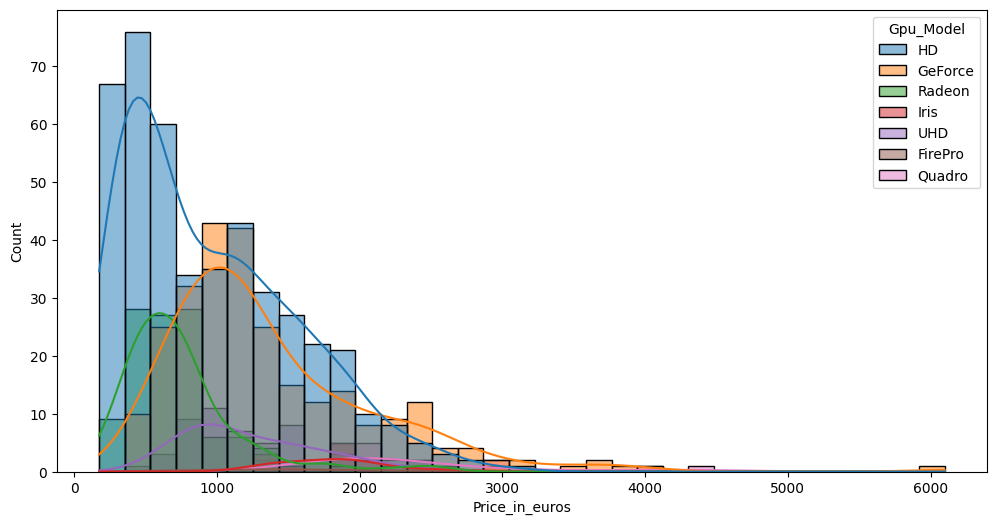

In [86]:
plt.figure(figsize=(12,6))
sns.histplot(df, x=target, hue="Gpu_Model", kde=True, palette="tab10")

<Axes: xlabel='Price_in_euros', ylabel='Count'>

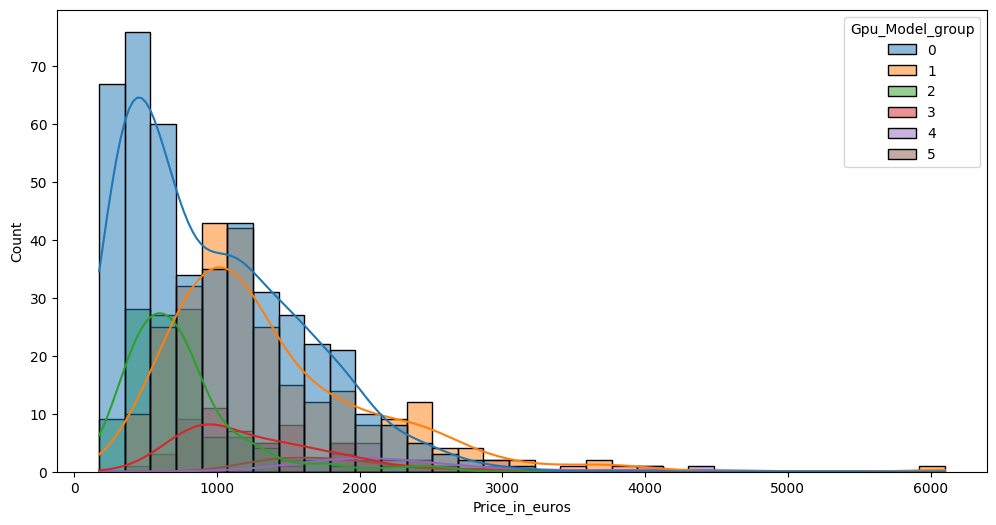

In [87]:
plt.figure(figsize=(12,6))
sns.histplot(df, x=target, hue="Gpu_Model_group", kde=True, palette="tab10")

### Hay una tarjeta grafica que no tiene GPU Family

- El PC con indice 661:
- El dataframe tiene el nombre interno del fabricante (R17M-M1-70), no el comercial. Vamos a cambiarla a mano en este caso.
- Si este error vuelve a darse, se le asignara como que es tarjeta grafica integrada en la CPU, dando un precio mas bajo.
- Se ha mirado en internet y esa tarjeta es la AMD Radeon R7 M530.
- Aplicaremos el cambio antes de los cambios realizados sobre la columna madre.

## `"OpSys"`

- El Sistema Operativo, podría tambie agruparse o hacer un one-hot-encoding.    
- Se va a analizar la media, la mediana y su desviación estandar para generar grupos.    
- Los grupos serán:

    - Gama_alta --> ["Windows 7", "Windows 10 S, "macOS]
    - Gama_media --> `["Windows 10", "mac OS X"]
    - Gama_entrada --> ["Linux", "No OS", "Chrome OS", "Android"]

- Se ha reducido de 9 categorias a 3 categorias.


In [88]:
df.OpSys.value_counts(dropna=False)

OpSys
Windows 10      741
Linux            48
No OS            44
Windows 7        29
Chrome OS        24
macOS            11
Windows 10 S      7
Mac OS X          6
Android           2
Name: count, dtype: int64

In [89]:
df.OpSys.value_counts(True)*100

OpSys
Windows 10      81.250000
Linux            5.263158
No OS            4.824561
Windows 7        3.179825
Chrome OS        2.631579
macOS            1.206140
Windows 10 S     0.767544
Mac OS X         0.657895
Android          0.219298
Name: proportion, dtype: float64

In [90]:
df_grouped_OS = df.groupby(["OpSys"], as_index=False)['Price_in_euros'].agg(mean_price='mean',median_price_OS='median',std_price='std')
df_grouped_OS.sort_values(by ="std_price", ascending=False)

,OpSys,mean_price,median_price_OS,std_price
7,Windows 7,1683.263448,1495.00,852.589861
6,Windows 10 S,1314.691429,1340.00,846.157018
5,Windows 10,1161.645951,1043.00,680.516673
8,macOS,1686.137273,1518.55,520.990213
1,Chrome OS,527.241667,365.00,473.595122
3,Mac OS X,1272.995000,1131.00,440.061355
4,No OS,598.877045,524.00,283.256826
2,Linux,604.945208,564.00,256.431074
0,Android,434.000000,434.00,162.634560


In [91]:
# Diccionario que asigna las categorías de gama a cada sistema operativo
mapping_os = {
    'Windows 7': 'Gama_alta',
    'Windows 10 S': 'Gama_alta',
    'macOS': 'Gama_alta',
    'Windows 10': 'Gama_media',
    'Mac OS X': 'Gama_media',
    'Linux': 'Gama_entrada',
    'No OS': 'Gama_entrada',
    'Chrome OS': 'Gama_entrada',
    'Android': 'Gama_entrada'
}

# Asignar los valores de gama a la columna OpSys utilizando map()
df['OpSys_group'] = df['OpSys'].map(mapping_os).astype('category') 

# Ver el DataFrame actualizado
df.head()


,laptop_ID,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros,ram_gb,weight_kg,Company_groups_unique,Company_groups,Company_Cluster,Inches_groups_unique,Inches_Cluster,Resolution_Type,Resolution_Pixels,Touchscreen,CPU_Manufacturer,CPU_Model,CPU_Frequency,CPU_Model_Type,CPU_Cluster,SSD_(GB),HDD_(GB),Flash_Storage_(GB),Hybrid_(GB),OtherTypeStorage_(GB),Gpu_Company,Gpu_Model,Gpu_Model_group,OpSys_group
0,755,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00,8,1.86,HP,Grupo_1,7,15.6,2,1920x1080,2073600,0,Intel,Core i3 6006U,2.0,i3,2,256,0,0,0,0,Intel,HD,0,Gama_media
1,618,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01,16,2.59,Dell,Grupo_1,7,15.6,2,1920x1080,2073600,0,Intel,Core i7 6700HQ,2.6,i7,0,0,1024,0,0,0,Nvidia,GeForce,1,Gama_media
2,909,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00,8,2.04,HP,Grupo_1,7,15.6,2,1920x1080,2073600,0,Intel,Core i7 7500U,2.7,i7,0,0,1024,0,0,0,Nvidia,GeForce,1,Gama_media
3,2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,8,1.34,Grupo_1,Grupo_2,3,13.3,0,1440x900,1296000,0,Intel,Core i5,1.8,i5,1,0,0,128,0,0,Intel,HD,0,Gama_alta
4,286,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00,4,2.25,Dell,Grupo_1,7,15.6,2,1920x1080,2073600,0,Intel,Core i3 6006U,2.0,i3,2,0,1024,0,0,0,AMD,Radeon,2,Gama_entrada


In [92]:
# Para Test

df2['OpSys_group'] = df2['OpSys'].map(mapping_os).astype('category') 


df2.head()

,laptop_ID,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,ram_gb,weight_kg,Company_groups_unique,Company_groups,Company_Cluster,Inches_groups_unique,Inches_Cluster,Resolution_Type,Resolution_Pixels,Touchscreen,CPU_Manufacturer,CPU_Model,CPU_Frequency,CPU_Model_Type,CPU_Cluster,SSD_(GB),HDD_(GB),Flash_Storage_(GB),Hybrid_(GB),OtherTypeStorage_(GB),Gpu_Company,Gpu_Model,Gpu_Model_group,OpSys_group
0,209,Lenovo,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.4kg,16,2.400,Lenovo,Grupo_1,7,15.6,2.0,1920x1080,2073600,0,Intel,Core i7 7700HQ,2.8,i7,0,256,0,0,0,0,Nvidia,GeForce,1.0,Gama_entrada
1,1281,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,4,2.400,Grupo_1,Grupo_2,0,15.6,2.0,1366x768,1049088,0,Intel,Celeron Dual Core N3060,1.6,Celeron,2,0,1024,0,0,0,Intel,HD,0.0,Gama_entrada
2,1168,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,Intel HD Graphics 520,No OS,1.9kg,4,1.900,Lenovo,Grupo_1,7,15.6,2.0,1366x768,1049088,0,Intel,Core i3 6006U,2.0,i3,2,0,1024,0,0,0,Intel,HD,0.0,Gama_entrada
3,1231,Dell,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.191kg,8,2.191,Dell,Grupo_1,7,13.3,2.0,1920x1080,2073600,1,Intel,Core i5 7200U,2.5,i5,1,0,0,128,0,0,Intel,HD,0.0,Gama_media
4,1020,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg,4,1.950,HP,Grupo_1,7,15.6,0.0,1920x1080,2073600,0,Intel,Core i5 7200U,2.5,i5,1,0,1024,0,0,0,Intel,HD,0.0,Gama_media


## `"Weight"`

- Ya se transformo esta variable al principio --> weight_kg
- El peso ha dado una correlacion linea de 0.19, por lo que no es evidente que tenga una relacion muy fuerte.

----
----
----

In [93]:
df.head()

,laptop_ID,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros,ram_gb,weight_kg,Company_groups_unique,Company_groups,Company_Cluster,Inches_groups_unique,Inches_Cluster,Resolution_Type,Resolution_Pixels,Touchscreen,CPU_Manufacturer,CPU_Model,CPU_Frequency,CPU_Model_Type,CPU_Cluster,SSD_(GB),HDD_(GB),Flash_Storage_(GB),Hybrid_(GB),OtherTypeStorage_(GB),Gpu_Company,Gpu_Model,Gpu_Model_group,OpSys_group
0,755,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00,8,1.86,HP,Grupo_1,7,15.6,2,1920x1080,2073600,0,Intel,Core i3 6006U,2.0,i3,2,256,0,0,0,0,Intel,HD,0,Gama_media
1,618,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01,16,2.59,Dell,Grupo_1,7,15.6,2,1920x1080,2073600,0,Intel,Core i7 6700HQ,2.6,i7,0,0,1024,0,0,0,Nvidia,GeForce,1,Gama_media
2,909,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00,8,2.04,HP,Grupo_1,7,15.6,2,1920x1080,2073600,0,Intel,Core i7 7500U,2.7,i7,0,0,1024,0,0,0,Nvidia,GeForce,1,Gama_media
3,2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,8,1.34,Grupo_1,Grupo_2,3,13.3,0,1440x900,1296000,0,Intel,Core i5,1.8,i5,1,0,0,128,0,0,Intel,HD,0,Gama_alta
4,286,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00,4,2.25,Dell,Grupo_1,7,15.6,2,1920x1080,2073600,0,Intel,Core i3 6006U,2.0,i3,2,0,1024,0,0,0,AMD,Radeon,2,Gama_entrada


In [94]:
tbb.ALL_describe_features(df)

,COL_N,DATA_TYPE,NO MISSING,MISSING,MISSING (%),UNIQUE_VALUES,CARDIN (%),DATA_CLASS
0,laptop_ID,int64,912,0,0.0,912,100.00,Numérica Continua
1,Company,object,912,0,0.0,19,2.08,Numérica Discreta
2,TypeName,category,912,0,0.0,6,0.66,Categórica
3,Inches,float64,912,0,0.0,17,1.86,Numérica Discreta
4,ScreenResolution,object,912,0,0.0,36,3.95,Numérica Discreta
5,Cpu,object,912,0,0.0,107,11.73,Numérica Discreta
6,Ram,object,912,0,0.0,9,0.99,Categórica
7,Memory,object,912,0,0.0,37,4.06,Numérica Discreta
8,Gpu,object,912,0,0.0,93,10.20,Numérica Discreta
9,OpSys,object,912,0,0.0,9,0.99,Categórica


In [95]:
categorical_columns = df.select_dtypes(include=['category']).columns
categorical_columns

Index(['TypeName', 'Company_Cluster', 'Inches_groups_unique', 'Inches_Cluster',
       'CPU_Cluster', 'Gpu_Model_group', 'OpSys_group'],
      dtype='object')

In [96]:
# Guardar Train

df.to_csv("./data/portatiles_train_v3.csv", index=False)


In [97]:
# Guardar Test

df2.to_csv("./data/portatiles_test_v3.csv", index=False)

In [98]:
# df.drop(["laptop_ID", "Price_in_euros"], axis= 1, inplace=True)
# tbb.ALL_describe_features(df)

In [99]:
# df2.drop(["laptop_ID"], axis= 1, inplace=True)
# tbb.ALL_describe_features(df2)

## Data processing

El target es la columna `Price_in_euros`

-----------------------------------------------------------------------------------------------------------------

## Modelado

### 1. Definir X e y

In [100]:
X = df.drop(['Price_in_euros'], axis=1)
y = df['Price_in_euros'].copy()
X.shape

(912, 35)

In [101]:
y.shape

(912,)

### 2. Dividir X_train, X_test, y_train, y_test

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

NameError: name 'train_test_split' is not defined

In [15]:
X_train

,id,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
25,748,Dell,Latitude 5480,Notebook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.6kg
84,1011,HP,EliteBook 820,Ultrabook,12.5,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,Windows 10,1.26kg
10,1002,Dell,Vostro 3568,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,4GB,128GB SSD,Intel HD Graphics 620,Windows 10,2.18kg
342,746,Samsung,Notebook 9,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,256GB SSD,Intel HD Graphics 620,Windows 10,0.81kg
890,575,Mediacom,SmartBook 141,Notebook,14.0,Full HD 1920x1080,Intel Atom x5-Z8350 1.44GHz,4GB,32GB SSD,Intel HD Graphics,Windows 10,1.4kg
...,...,...,...,...,...,...,...,...,...,...,...,...
106,397,Lenovo,ThinkPad L470,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.9kg
270,714,Dell,Latitude 5580,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7300U 2.6GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.93kg
860,85,Dell,Inspiron 7577,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.65kg
435,812,Samsung,Notebook 9,Ultrabook,13.3,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,0.81kg


### 3. Baseline de modelos


### 4. Sacar métricas, valorar los modelos 

Recuerda que en la competición se va a evaluar con la métrica de RMSE.

-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir ``test.csv``

**RECUERDA: APLICAR LAS TRANSFORMACIONES QUE HAYAS REALIZADO EN `train.csv` a `test.csv`.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 1. Carga los datos de `test.csv` para predecir.


In [ ]:
X_pred = pd.read_csv("data/test.csv")
X_pred.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
id,,,,,,,,,,,
1184,HP,Pavilion 15-BC000nv,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,6GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.18kg
815,Lenovo,Thinkpad T470s,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.32kg
1244,HP,EliteBook 840,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.54kg
1121,HP,Spectre Pro,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.16kg
443,Lenovo,IdeaPad 320-15IAP,Notebook,15.6,Full HD 1920x1080,Intel Pentium Quad Core N4200 1.1GHz,4GB,128GB SSD,Intel HD Graphics 505,Windows 10,2.2kg


In [19]:
X_pred.shape

(391, 11)

In [ ]:
predictions_submit = model.predict(X_pred)
predictions_submit

**¡OJO! ¿Por qué me da error?** 

IMPORTANTE:

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO **BORRAR FILAS**, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER **391 FILAS**, SI O SI

**Entonces, si al cargar los datos de ``train.csv`` usaste `index_col=0`, ¿tendré que hacer lo también para el `test.csv`?**

In [ ]:
# ¿Qué opináis?
# ¿Sí, no?

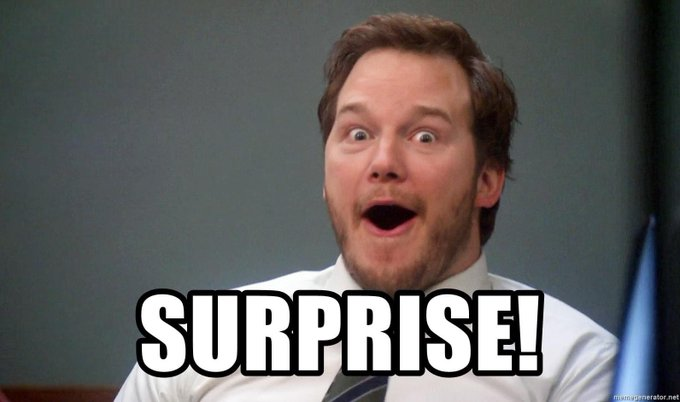

### 3. **¿Qué es lo que subirás a Kaggle?**

**Para subir a Kaggle la predicción esta tendrá que tener una forma específica.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [23]:
sample = pd.read_csv("data/sample_submission.csv")

In [24]:
sample.head()

,id,Price_euros
0,1184,2158
1,815,511
2,1244,5290
3,1121,622
4,443,1140


In [25]:
sample.shape

(391, 2)

### 4. Mete tus predicciones en un dataframe llamado ``submission``.

In [ ]:
submission = pd.DataFrame({"laptop_ID": X_pred.index, "Price_in_euros": predictions_submit})

In [27]:
submission.head()

,id,Price_euros
0,1184,2158
1,815,511
2,1244,5290
3,1121,622
4,443,1140


In [28]:
submission.shape

(391, 2)

### 5. Pásale el CHEQUEADOR para comprobar que efectivamente está listo para subir a Kaggle.

In [31]:
def chequeador(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.laptop_ID.all() == sample.laptop_ID.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://www.mihaileric.com/static/evaluation-meme-e0a350f278a36346e6d46b139b1d0da0-ed51e.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Iván y Manuel: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `laptops_test.csv`. Lloramos.")

In [34]:
chequeador(submission)

You're ready to submit!
